In [1]:
from astropy.io import fits
import numpy as np
from astropy.table import QTable
import astropy.units as u
import astropy.utils
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import matplotlib.colors
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import lognorm
from astropy.timeseries import LombScargle
import time
from astropy.visualization import hist
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
from astropy.timeseries import BoxLeastSquares
from astropy.timeseries import TimeSeries
from astropy.time import Time
import functions

In [2]:
t_zr=QTable.read('t_zr_0518.ecsv')
t_zg=QTable.read('t_zg_0518.ecsv')
t_zr=t_zr[np.isnan(t_zr['LNP_SIG'])==False]
t_zg=t_zg[np.isnan(t_zg['LNP_SIG'])==False]

(array([1664.,  175.,  119.,   61.,   47.,   36.,   35.,   27.,   25.,
          15.,   18.,   25.,   17.,   16.,   19.,   14.,   21.,   28.]),
 array([5.72332407e-123, 5.63210106e-002, 1.12642021e-001, 1.68963032e-001,
        2.25284042e-001, 2.81605053e-001, 3.37926064e-001, 3.94247074e-001,
        4.50568085e-001, 5.06889096e-001, 5.63210106e-001, 6.19531117e-001,
        6.75852127e-001, 7.32173138e-001, 7.88494149e-001, 8.44815159e-001,
        9.01136170e-001, 9.57457181e-001, 1.01377819e+000]),
 <BarContainer object of 18 artists>)

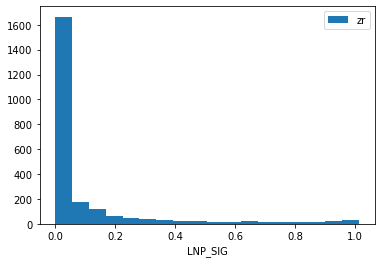

In [27]:
histo=hist(t_zr['LNP_SIG'],bins='scott',label='zr')
plt.xlabel('LNP_SIG')
plt.legend()
histo
#plt.gca().set_xscale("log")
#plt.gca().set_yscale("log")

(array([1.058e+03, 9.800e+01, 3.800e+01, 2.600e+01, 2.500e+01, 1.400e+01,
        8.000e+00, 9.000e+00, 9.000e+00, 4.000e+00, 8.000e+00, 1.100e+01,
        5.000e+00, 5.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 5.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 5.000e+00]),
 array([6.50308945e-81, 4.35527857e-02, 8.71055714e-02, 1.30658357e-01,
        1.74211143e-01, 2.17763928e-01, 2.61316714e-01, 3.04869500e-01,
        3.48422286e-01, 3.91975071e-01, 4.35527857e-01, 4.79080643e-01,
        5.22633428e-01, 5.66186214e-01, 6.09739000e-01, 6.53291785e-01,
        6.96844571e-01, 7.40397357e-01, 7.83950143e-01, 8.27502928e-01,
        8.71055714e-01, 9.14608500e-01, 9.58161285e-01, 1.00171407e+00]),
 <BarContainer object of 23 artists>)

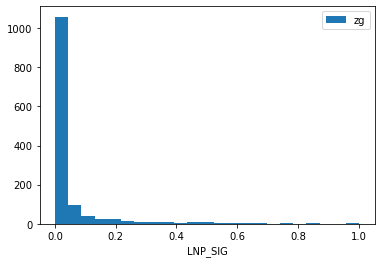

In [28]:
histo=hist(t_zg['LNP_SIG'],bins='scott',label='zg')
plt.xlabel('LNP_SIG')
plt.legend()
histo
#plt.gca().set_xscale("log")
#plt.gca().set_yscale("log")

In [29]:
fs=15

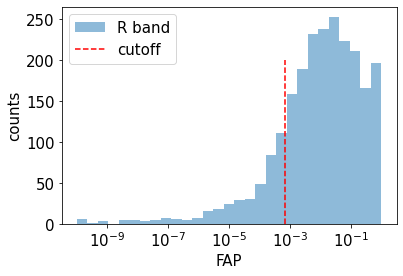

In [37]:
histo=hist(t_zr['LNP_SIG'],bins=np.logspace(np.log10(1e-10),np.log10(1),num=30),label='R band',alpha=0.5)
plt.vlines(0.0007077841279335969,0,200,ls='--',color='r',label='cutoff')
#,histtype='step'
plt.xlabel('FAP',fontsize=fs)
plt.ylabel('counts',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
plt.gca().set_xscale("log")
#plt.gca().set_yscale("log")
#histo

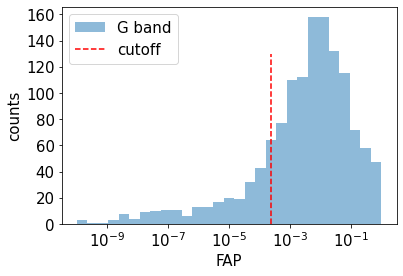

In [39]:
histo=hist(t_zg['LNP_SIG'],bins=np.logspace(np.log10(1e-10),np.log10(1),num=30),label='G band',alpha=0.5)
#,histtype='step'
plt.vlines(0.0002465207306520509,0,130,ls='--',color='r',label='cutoff')
#,histtype='step'
plt.xlabel('FAP',fontsize=fs)
plt.ylabel('counts',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
plt.gca().set_xscale("log")
#plt.gca().set_yscale("log")
#histo

In [43]:
np.sort(t_zr['LNP_SIG'])[int(t_zr['LNP_SIG'].size*0.2)],np.sort(t_zg['LNP_SIG'])[int(t_zg['LNP_SIG'].size*0.2)]

(0.0007077841279335969, 0.0002465207306520509)

In [44]:
np.sort(t_zr['LNP_SIG'])[int(t_zr['LNP_SIG'].size*0.01)],np.sort(t_zg['LNP_SIG'])[int(t_zg['LNP_SIG'].size*0.01)]

(1.2910391728313936e-30, 7.413996260819829e-11)

In [45]:
def cut_LNP_SIG(t,period,LNP_SIG):
    #t=t[(t['period']<period[0])|(t['period']>period[1])]
    #t=t[(t['period']<period[2])|(t['period']>period[3])]
    #if len(period)>4:
        #t=t[(t['period']<period[4])|(t['period']>period[5])]
    t=t[t['LNP_SIG']<LNP_SIG]
    return t

period_cut_zr=(0.9970680102358369, 1.000477498206994)
period_cut_zg=(0.9969219076948225, 1.0015691227311536)

t_zr=cut_LNP_SIG(t_zr,period_cut_zr,0.0007077841279335969)
t_zg=cut_LNP_SIG(t_zg,period_cut_zg,0.0002465207306520509)

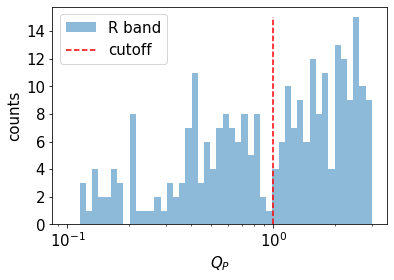

In [61]:
obj=t_zr['power']/t_zr['power_c']
plt.hist(obj, bins=np.logspace(np.log10(0.1),np.log10(3.0), 50),alpha=0.5,label='R band')
plt.vlines(1,0,15,ls='--',color='r',label='cutoff')
plt.xlabel('$Q_P$',fontsize=fs)
plt.ylabel('counts',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
#plt.gca().set_yscale("log")
plt.gca().set_xscale("log")


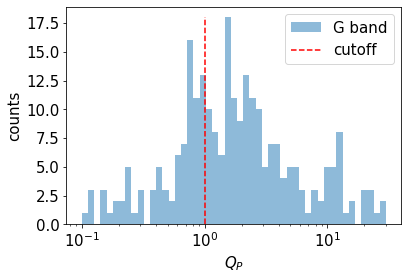

In [63]:
obj=t_zg['power']/t_zg['power_c']
plt.hist(obj, bins=np.logspace(np.log10(0.1),np.log10(30.0), 50),alpha=0.5,label='G band')
plt.vlines(1,0,18,ls='--',color='r',label='cutoff')
plt.xlabel('$Q_P$',fontsize=fs)
plt.ylabel('counts',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
#plt.gca().set_yscale("log")
plt.gca().set_xscale("log")

In [48]:
obj_zr=t_zr[t_zr['power']/t_zr['power_c']>=1]
obj_zg=t_zg[t_zg['power']/t_zg['power_c']>=1]

(2.4327065203580855, 1.205607978996226, 0.8059311634178362)

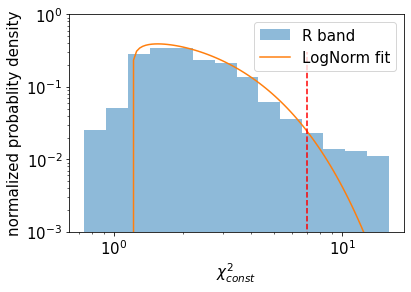

In [49]:
tt_zr=t_zr[(t_zr['CONST_CHI2']>0)&(t_zr['CONST_CHI2']<16)]
_, bins = np.histogram(np.log10(tt_zr['CONST_CHI2']), bins='auto')
plt.hist(tt_zr['CONST_CHI2'], bins=10**bins,density=1,alpha=0.5,label='R band');
ttt_zr=tt_zr[(tt_zr['CONST_CHI2']>1.2)&(tt_zr['CONST_CHI2']<10)]
shape, loc, scale = chi2.fit(ttt_zr['CONST_CHI2'])
bins=np.logspace(np.log10(tt_zr['CONST_CHI2'].min()),np.log10(tt_zr['CONST_CHI2'].max()), 100)  # more bins to smoother fit curve
best_fit_line = chi2.pdf(bins, shape, loc, scale)
plt.plot(bins, best_fit_line,label='LogNorm fit')
plt.vlines(7,0,0.3,ls='--',color='r')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.ylim(1e-3,1)
plt.xlabel('$\chi^2_{const}$',fontsize=fs)
plt.ylabel('normalized probablity density',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
shape, loc, scale 

(9.586426114010624, 0.8177504802443745, 0.14937052909838594)

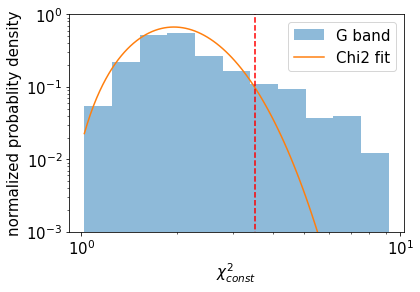

In [50]:
tt_zg=t_zg[(t_zg['CONST_CHI2']>0.3)&(t_zg['CONST_CHI2']<10)]
_, bins = np.histogram(np.log10(tt_zg['CONST_CHI2']), bins='auto')
plt.hist(tt_zg['CONST_CHI2'], bins=10**bins,density=1,alpha=0.5,label='G band');
ttt_zg=tt_zg[(tt_zg['CONST_CHI2']>0.5)&(tt_zg['CONST_CHI2']<4)]
shape, loc, scale = chi2.fit(ttt_zg['CONST_CHI2'])
bins=np.logspace(np.log10(tt_zg['CONST_CHI2'].min()),np.log10(tt_zg['CONST_CHI2'].max()), 100)  # more bins to smoother fit curve
best_fit_line = chi2.pdf(bins, shape, loc, scale)
plt.plot(bins, best_fit_line,label='Chi2 fit')
plt.vlines(3.5,0,1,ls='--',color='r')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.ylim(1e-3,1)
plt.xlabel('$\chi^2_{const}$',fontsize=fs)
plt.ylabel('normalized probablity density',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
shape, loc, scale

In [64]:
obj_zr=obj_zr[obj_zr['CONST_CHI2']>7]
obj_zg=obj_zg[obj_zg['CONST_CHI2']>3.5]

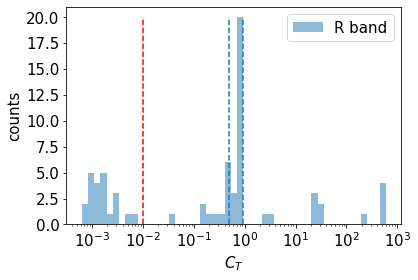

In [72]:
obj=np.abs(obj_zr['period']-obj_zr['period_c'])/obj_zr['period_c']
plt.hist(obj, bins=np.logspace(np.log10(obj[obj!=0].min()),np.log10(obj.max()), 50),alpha=0.5,label='R band')
#plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.vlines((0.49,0.91),0,20,ls='--')
plt.vlines((1e-2),0,20,ls='--',color='r')
plt.xlabel('$C_T$',fontsize=fs)
plt.ylabel('counts',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
#plt.xlim(0.1,1)

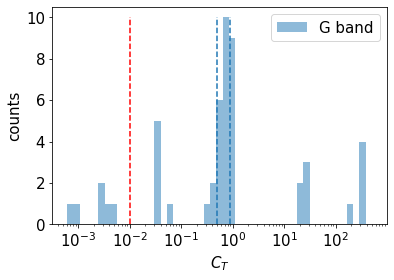

In [75]:
obj=np.abs(obj_zg['period']-obj_zg['period_c'])/obj_zg['period_c']
plt.hist(obj, bins=np.logspace(np.log10(obj[obj!=0].min()),np.log10(obj.max()), 50),alpha=0.5,label='G band')
#plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.vlines((0.49,0.91),0,10,ls='--')
plt.vlines((1e-2),0,10,ls='--',color='r')
plt.xlabel('$C_T$',fontsize=fs)
plt.ylabel('counts',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)

In [3]:
t_zr=QTable.read('t_zr_0518.ecsv')
t_zg=QTable.read('t_zg_0518.ecsv')
t_zr=t_zr[np.isnan(t_zr['LNP_SIG'])==False]
t_zg=t_zg[np.isnan(t_zg['LNP_SIG'])==False]


# select low LNP_SIG ones
def cut_LNP_SIG(t,period,LNP_SIG):
    #t=t[(t['period']<period[0])|(t['period']>period[1])]
    #t=t[(t['period']<period[2])|(t['period']>period[3])]
    #if len(period)>4:
        #t=t[(t['period']<period[4])|(t['period']>period[5])]
    t=t[t['LNP_SIG']<LNP_SIG]
    return t

# actually didn't do this cut. It's covered in later steps
period_cut_zr=(0.9970680102358369, 1.000477498206994)
period_cut_zg=(0.9969219076948225, 1.0015691227311536)

t_zr=cut_LNP_SIG(t_zr,period_cut_zr,0.0007077841279335969)
t_zg=cut_LNP_SIG(t_zg,period_cut_zg,0.0002465207306520509)


# cut power ratios
obj_zr=t_zr[t_zr['power']/t_zr['power_c']>=1]
obj_zg=t_zg[t_zg['power']/t_zg['power_c']>=1]

# cut CONST_CHI2
obj_zr=obj_zr[obj_zr['CONST_CHI2']>7]
obj_zg=obj_zg[obj_zg['CONST_CHI2']>3.5]

# cut close periods
obj_zr=obj_zr[np.abs(obj_zr['period']-obj_zr['period_c'])/obj_zr['period_c']>1e-2]
obj_zg=obj_zg[np.abs(obj_zg['period']-obj_zg['period_c'])/obj_zg['period_c']>1e-2]

obj_zr=obj_zr[(np.abs(obj_zr['period']-obj_zr['period_c'])/obj_zr['period_c']<0.49)|(np.abs(obj_zr['period']-obj_zr['period_c'])/obj_zr['period_c']>0.91)|(obj_zr['LNP_SIG']<1.2910391728313936e-30)]
obj_zg=obj_zg[(np.abs(obj_zg['period']-obj_zg['period_c'])/obj_zg['period_c']<0.49)|(np.abs(obj_zg['period']-obj_zg['period_c'])/obj_zg['period_c']>0.91)|(obj_zg['LNP_SIG']<7.413996260819829e-11)]




# restore original table for ploting reasons
t_zr=QTable.read('t_zr_0518.ecsv')
t_zg=QTable.read('t_zg_0518.ecsv')

# choose only OID with highest numobs
mask=np.zeros(len(obj_zr))+1
for i,obj in enumerate(obj_zr):
    copy=t_zr[t_zr['SourceID']==obj['SourceID']]
    if len(copy)==1:
        if obj['numobs']<50:
            mask[i]=0
    if len(copy)>1:
        if obj['OID']!=copy['OID'][copy['numobs'].argmax()]:
            mask[i]=0
obj_zr=obj_zr[mask==1]


mask=np.zeros(len(obj_zg))+1
for i,obj in enumerate(obj_zg):
    copy=t_zg[t_zg['SourceID']==obj['SourceID']]
    if len(copy)==1:
        if obj['numobs']<50:
            mask[i]=0
    if len(copy)>1:
        if obj['OID']!=copy['OID'][copy['numobs'].argmax()]:
            mask[i]=0
obj_zg=obj_zg[mask==1]

In [4]:
#obj_zr.write('periodic_zr_ztf.ecsv',overwrite=True)
#obj_zg.write('periodic_zg_ztf.ecsv',overwrite=True)

In [5]:
def LNP_catalog(t_zr,t_zg):
    zr=np.array(t_zr['SourceID'])
    zg=np.array(t_zg['SourceID'])
    unique=np.unique(np.append(zg,zr))
    t = QTable([unique,np.isin(unique,zr),np.isin(unique,zg),np.full(len(unique), np.nan),np.full(len(unique), np.nan),np.empty(len(unique),'S14'),np.empty(len(unique),'S14')],names=('SourceID', 'variant in zr','variant in zg','period in zr','period in zg','upsilon class in zr','upsilon class in zg'))
    t['upsilon class in zr']='nan'
    t['upsilon class in zg']='nan'
    
    
    for obj in t_zr:
        t['period in zr'][np.where(t['SourceID']==obj['SourceID'])]=obj['period']
        t['upsilon class in zr'][np.where(t['SourceID']==obj['SourceID'])]=obj['upsilon_class']
        
    for obj in t_zg:
        t['period in zg'][np.where(t['SourceID']==obj['SourceID'])]=obj['period']
        t['upsilon class in zg'][np.where(t['SourceID']==obj['SourceID'])]=obj['upsilon_class']

    t['period in zr']*=u.day
    t['period in zg']*=u.day
    
    return t
cata=LNP_catalog(obj_zr,obj_zg)

In [6]:
obj_zr

<QTable length=13>
SourceID filter       OID        ... upsilon_flag    upsilon_period  
 int32    str2       str16       ...   float64          float64      
-------- ------ ---------------- ... ------------ -------------------
      52     zr  806203100023276 ...          0.0   642.8628877500013
      77     zr  806203100063307 ...          0.0  26.601222941379365
      90     zr  806203100056957 ...          0.0   1928.588663250004
     101     zr  806203100060469 ...          1.0 0.03852201204840993
     114     zr 1809211300066628 ...          1.0  1.3343710337675274
    6357     zr  806203100065924 ...          1.0   0.700032182667878
     242     zr  806203100023385 ...          0.0  1285.7257755000026
    1029     zr  806203100022104 ...          1.0 0.06227443259373622
    1090     zr  806203400058898 ...          1.0 0.31113212170201815
    1259     zr  806203100052030 ...          0.0   642.8628877500013
    1706     zr  806203400000031 ...          0.0  1.4577389744897988
    1903     zr  806203400030775 ...          1.0 0.16738727436276674
    2008     zr  806203400030847 ...          0.0   21.54847668435759

In [7]:
obj_zg

<QTable length=17>
SourceID filter       OID       ... upsilon_flag    upsilon_period   
 int32    str2       str16      ...   float64          float64       
-------- ------ --------------- ... ------------ --------------------
      37     zg 806103100045173 ...          1.0  0.17730488411389636
      73     zg 806103100048650 ...          1.0  0.04003408271746405
      77     zg 806103100029923 ...          0.0    26.64318238750002
     113     zg 806103100036178 ...          1.0  0.07010285598319828
     301     zg 806103100049413 ...          1.0 0.035556507421549206
     708     zg 806103100019798 ...          1.0   0.9647016001508681
     764     zg 806103100048933 ...          1.0  0.03110961350709333
     766     zg 806103100045165 ...          1.0   1.0350958523889302
     771     zg 806103100019171 ...          1.0   1.0350442517307674
    1007     zg 806103100045100 ...          1.0  0.04470060166272526
    1231     zg 806103100042740 ...          1.0  0.04762548967136744
    1385     zg 806103100035942 ...          1.0  0.09541193690503393
    1627     zg 806103400029845 ...          1.0    321.9757407249999
    1642     zg 806103400000039 ...          0.0    321.9757407249999
    1744     zg 806103400020600 ...          0.0    482.9636110874998
    2008     zg 806103400000320 ...          0.0   21.462256559668482
    2545     zg 806103400000401 ...          1.0   0.5079209532053894

In [6]:
cata

<QTable length=28>
SourceID variant in zr variant in zg ... upsilon class in zr upsilon class in zg
                                     ...                                        
 int32        bool          bool     ...       bytes14             bytes14      
-------- ------------- ------------- ... ------------------- -------------------
      37         False          True ...                 nan              NonVar
      52          True         False ...       LPV_OSARG_AGB                 nan
      73         False          True ...                 nan                DSCT
      77          True          True ...          CEPH_Other          CEPH_Other
      90          True         False ...      LPV_Mira_AGB_C                 nan
     101          True         False ...              NonVar                 nan
     113         False          True ...                 nan                DSCT
     114          True         False ...          CEPH_Other                 nan
     242          True         False ...       LPV_SRV_AGB_C                 nan
     ...           ...           ... ...                 ...                 ...
    1259          True         False ...       LPV_OSARG_AGB                 nan
    1385         False          True ...                 nan                DSCT
    1627         False          True ...                 nan       LPV_OSARG_RGB
    1642         False          True ...                 nan       LPV_OSARG_RGB
    1706          True         False ...               EB_ED                 nan
    1744         False          True ...                 nan       LPV_OSARG_AGB
    1903          True         False ...                DSCT                 nan
    2008          True          True ...              EB_ESD              EB_ESD
    2545         False          True ...                 nan              RRL_ab
    6357          True         False ...              RRL_ab                 nan

In [7]:
cata[cata['variant in zg']&cata['variant in zr']]

<QTable length=2>
SourceID variant in zr variant in zg ... upsilon class in zr upsilon class in zg
                                     ...                                        
 int32        bool          bool     ...       bytes14             bytes14      
-------- ------------- ------------- ... ------------------- -------------------
      77          True          True ...          CEPH_Other          CEPH_Other
    2008          True          True ...              EB_ESD              EB_ESD

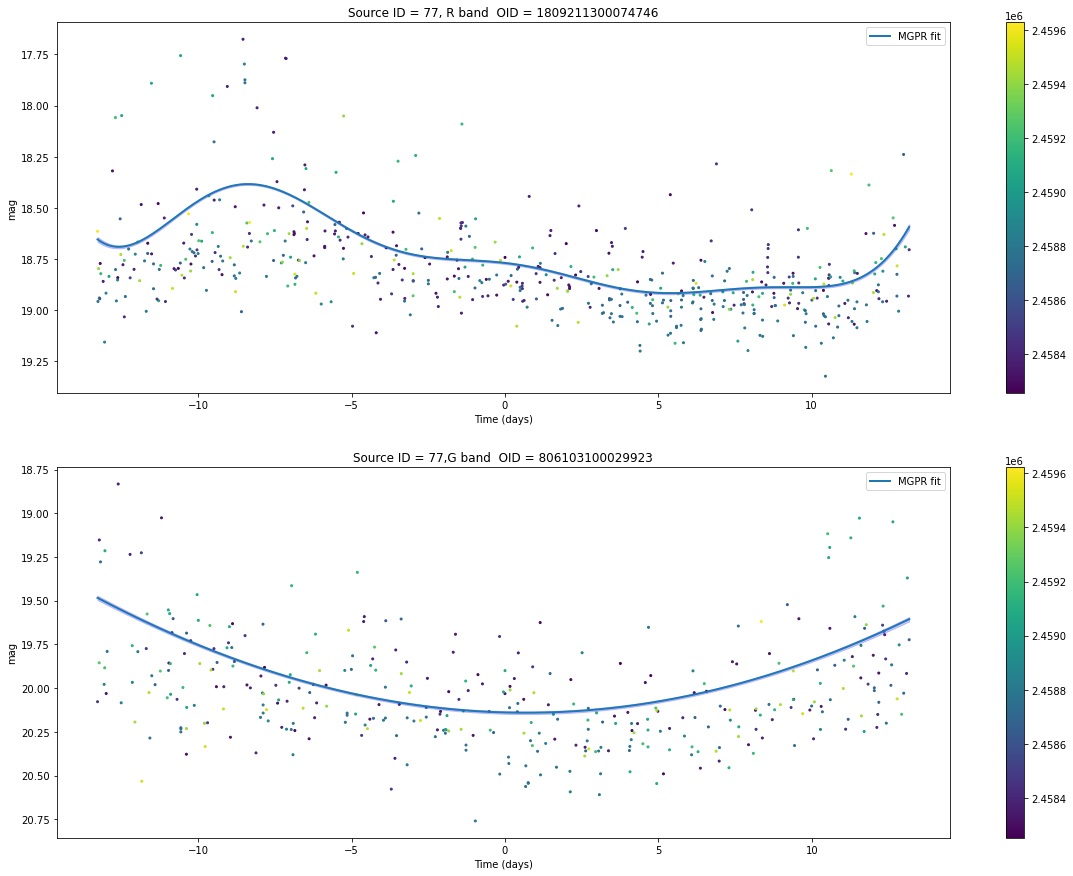

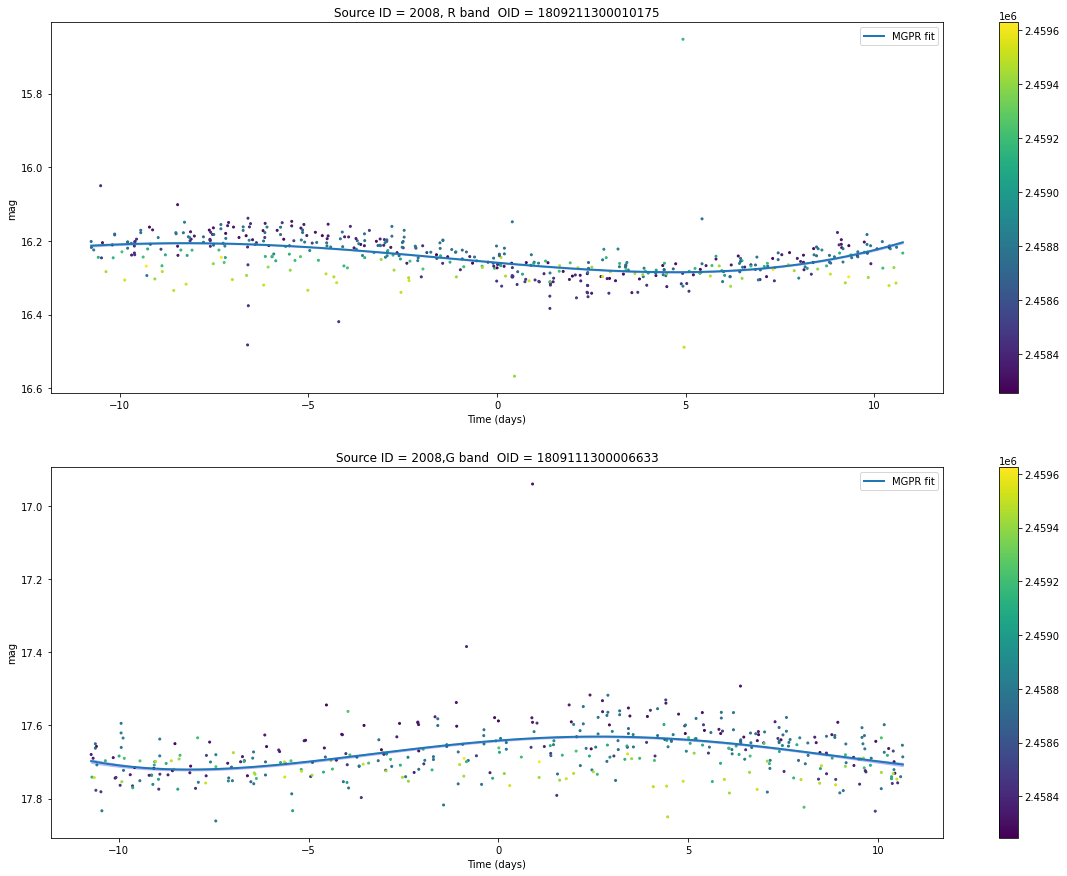

In [36]:
for row in cata[cata['variant in zg']&cata['variant in zr']]:
    functions.MGPRfit(row['SourceID'])

In [45]:
functions.query(2008)

<QTable length=2>
SourceID filter       OID        ... upsilon_flag   upsilon_period  
 int32    str2       str16       ...   float64         float64      
-------- ------ ---------------- ... ------------ ------------------
    2008     zr  806203400030847 ...          0.0  21.54847668435759
    2008     zr 1809211300010175 ...          1.0 1.0452922226844523

<QTable length=2>
SourceID filter       OID        ... upsilon_flag   upsilon_period  
 int32    str2       str16       ...   float64         float64      
-------- ------ ---------------- ... ------------ ------------------
    2008     zg  806103400000320 ...          0.0 21.462256559668482
    2008     zg 1809111300006633 ...          1.0 22.954838911475175

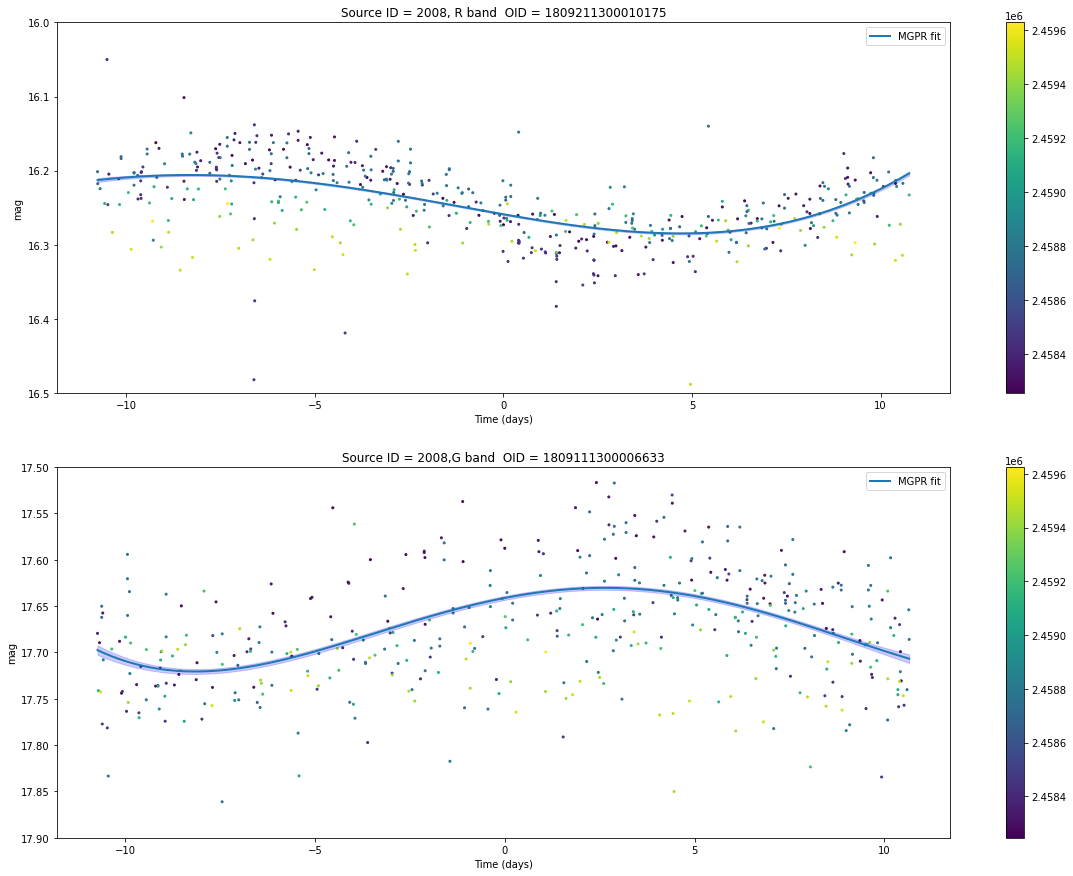

In [38]:
functions.MGPRfit(2008,ylim=[(16.5,16.0),(17.9,17.5)])

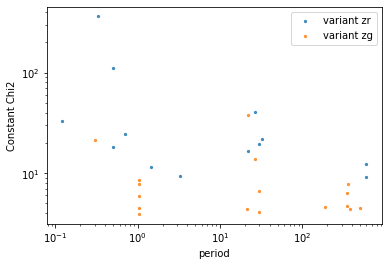

In [9]:
plt.scatter(obj_zr['period'],obj_zr['CONST_CHI2'],s=5,label='variant zr',alpha=0.8)
plt.scatter(obj_zg['period'],obj_zg['CONST_CHI2'],s=5,label='variant zg',alpha=0.8)
plt.xlabel('period')
plt.ylabel('Constant Chi2')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.legend()

D:\Anaconda3\lib\site-packages\george\metrics.py:103: RuntimeWarning: divide by zero encountered in log
  parameters.append(np.log(metric))


No data found in G band
No data found in G band
No data found in G band


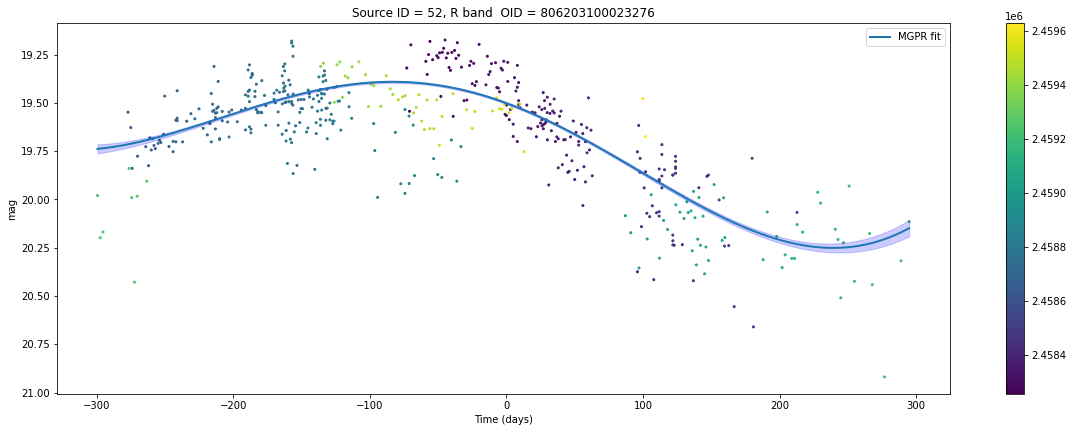

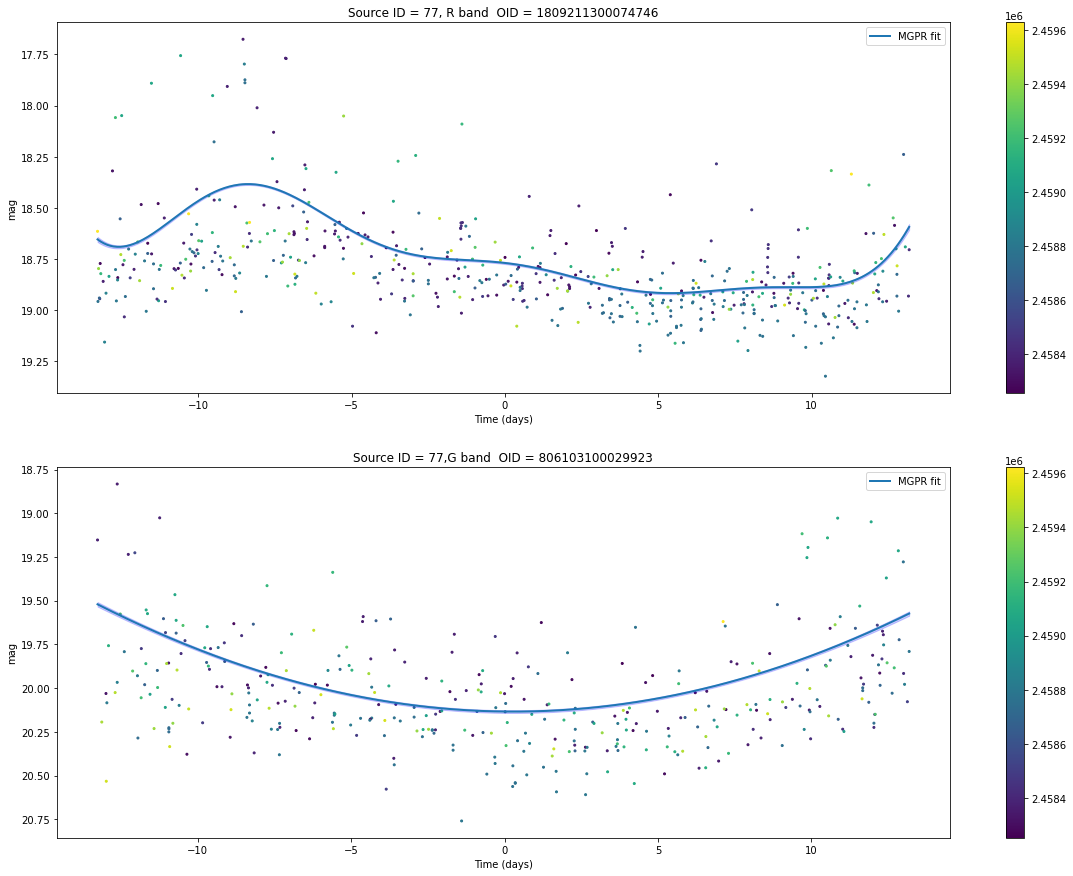

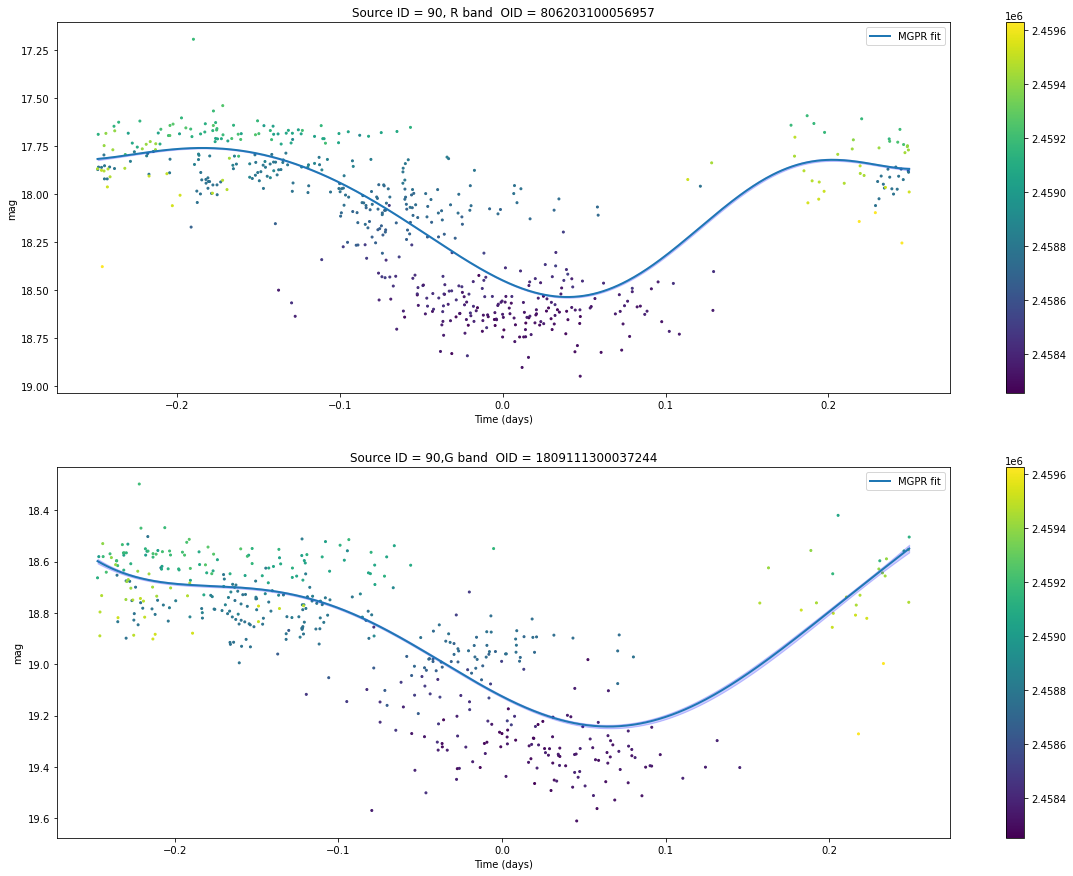

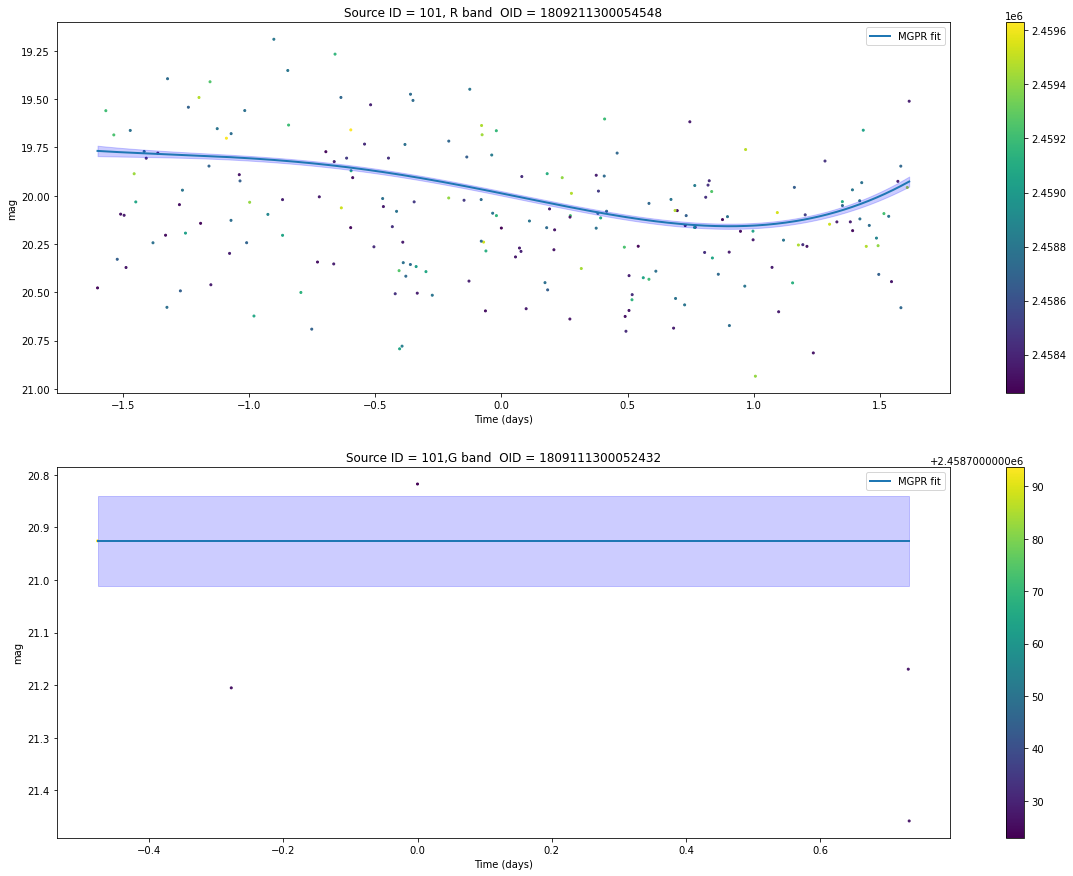

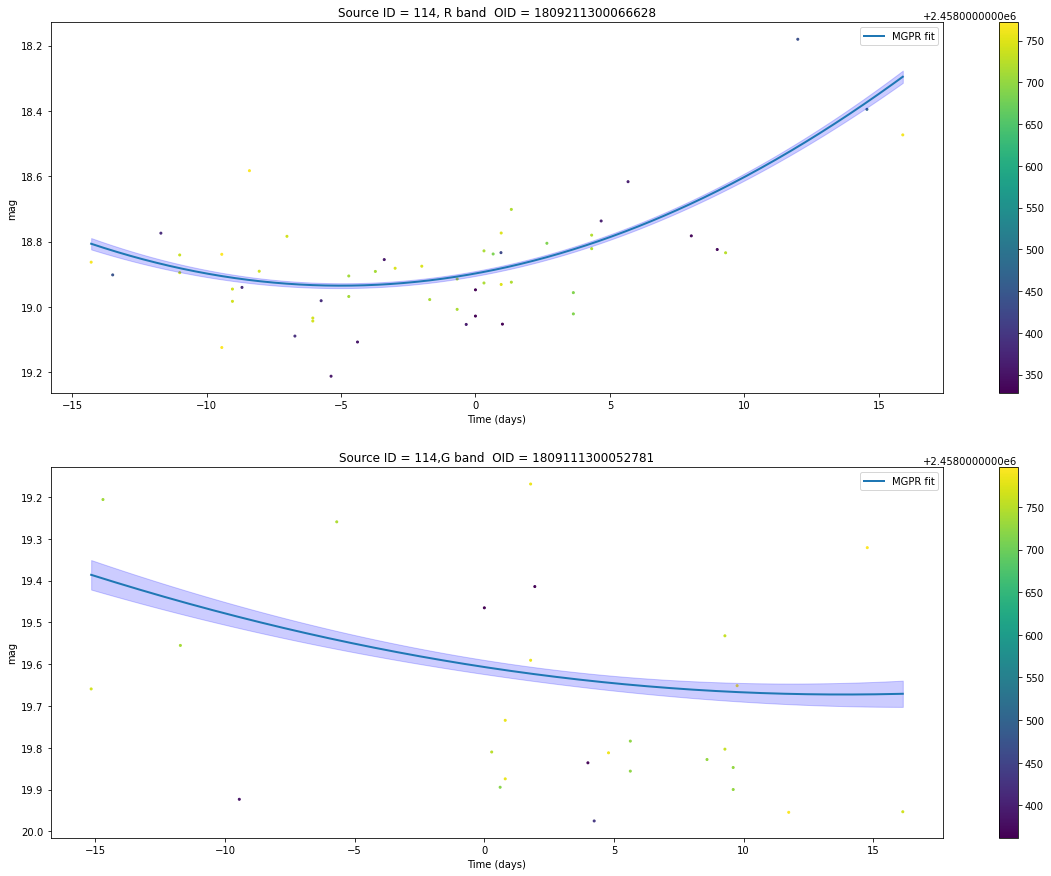

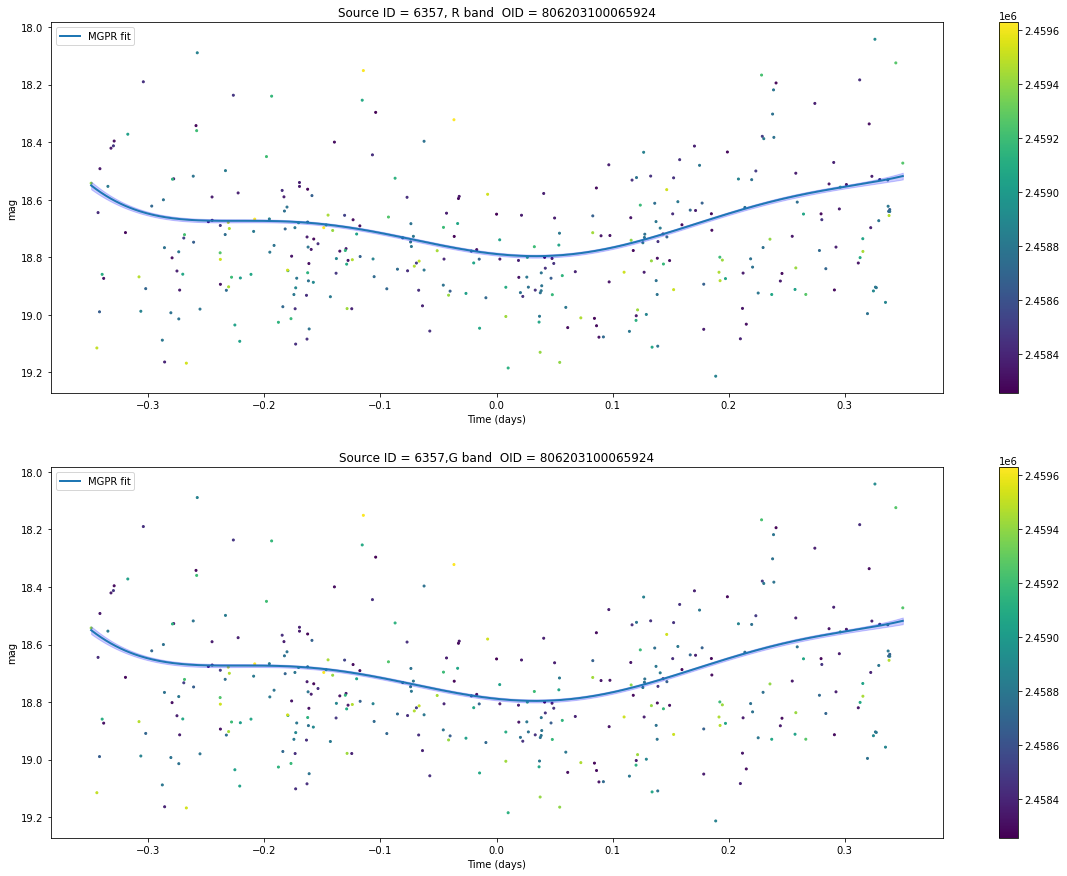

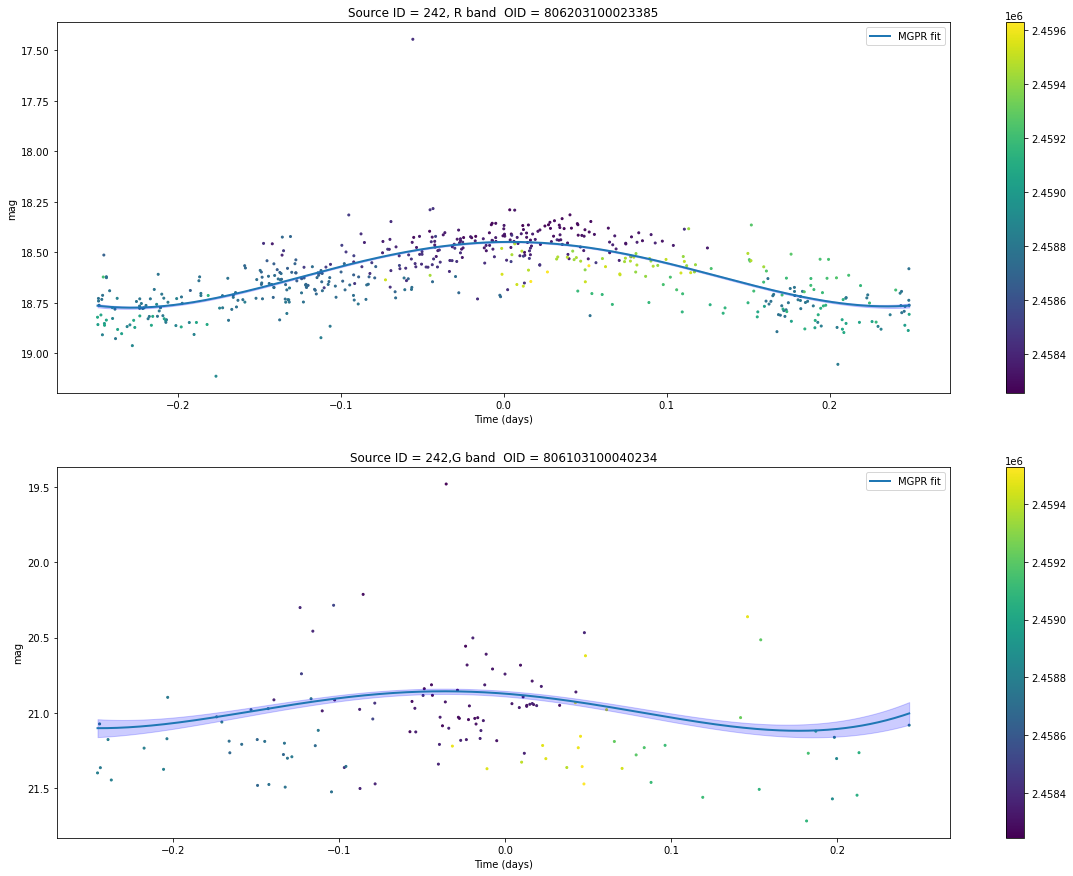

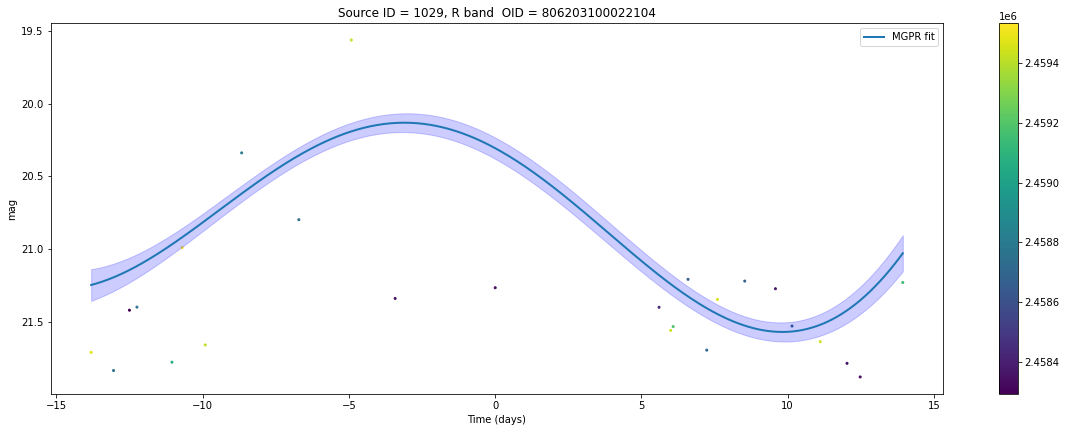

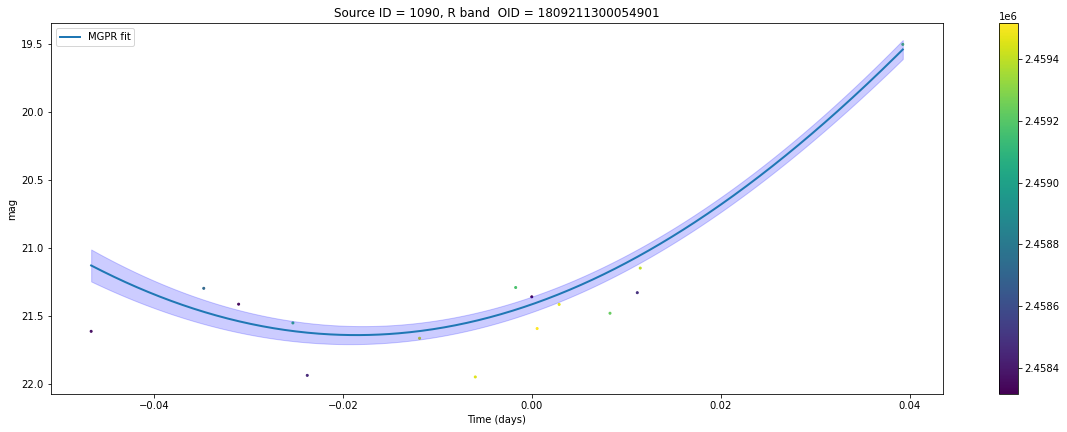

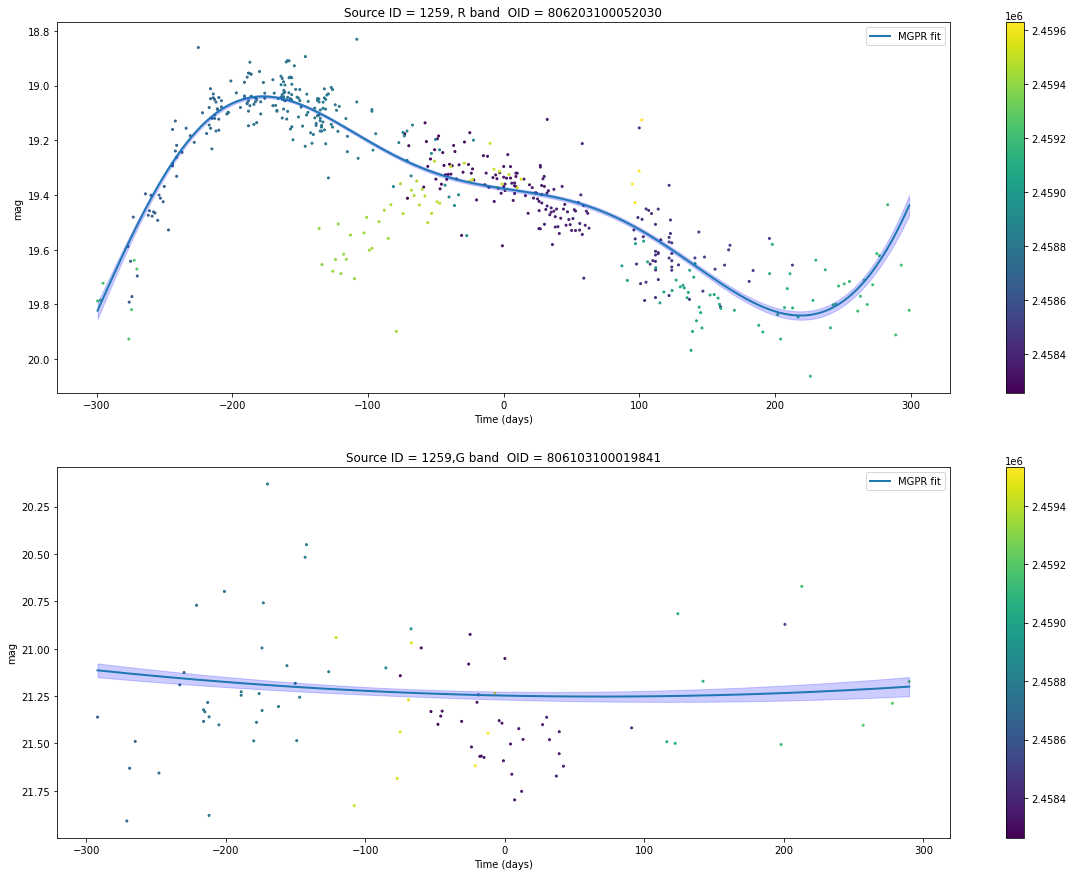

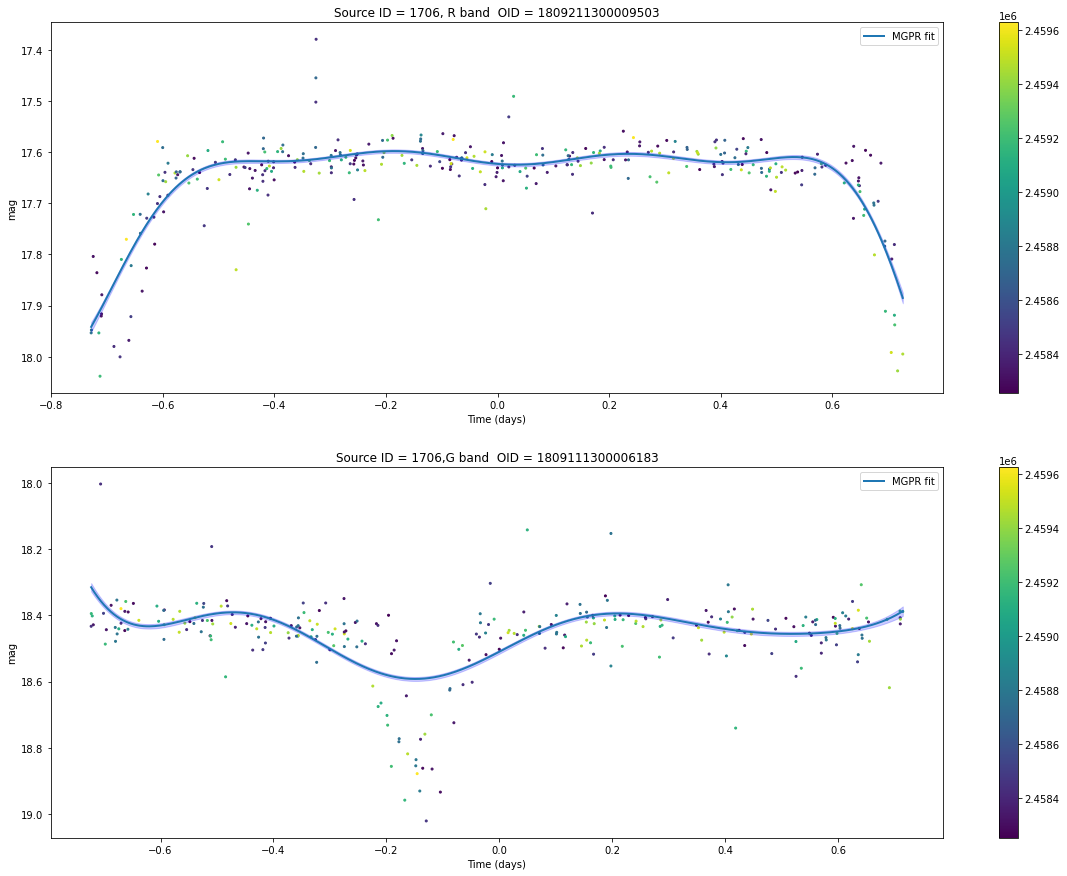

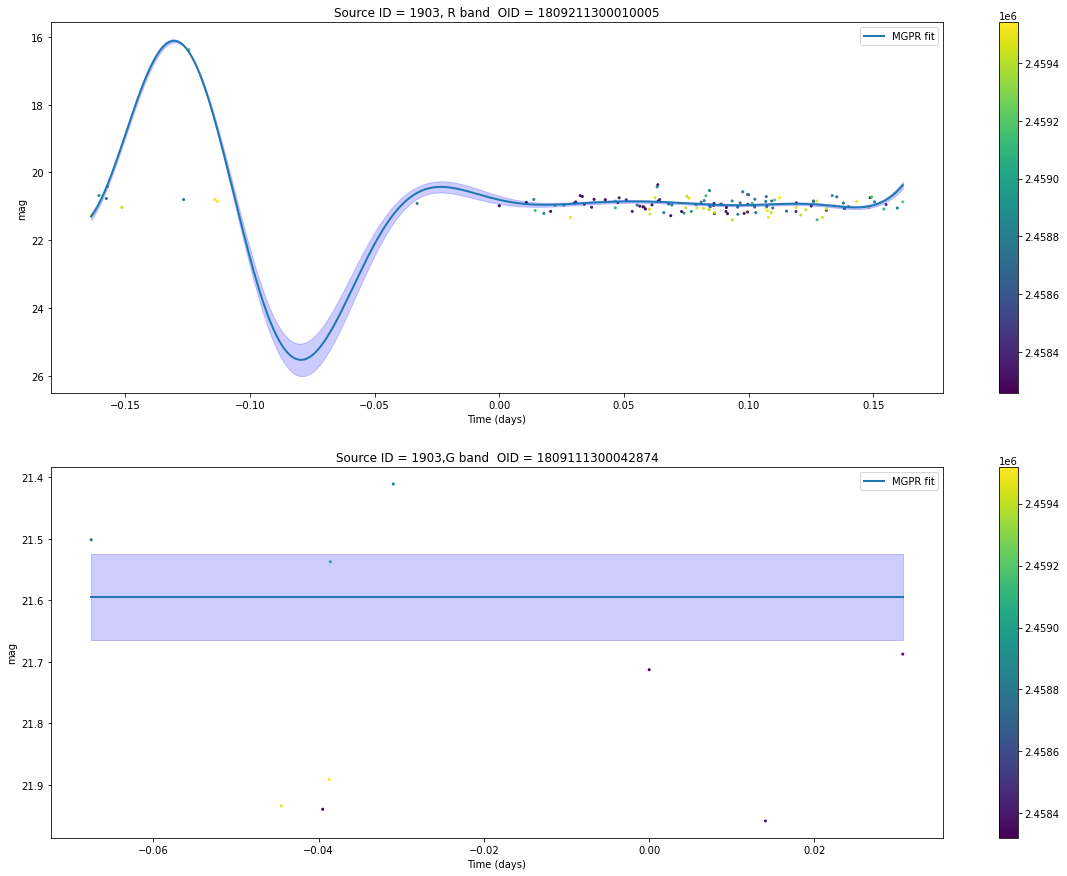

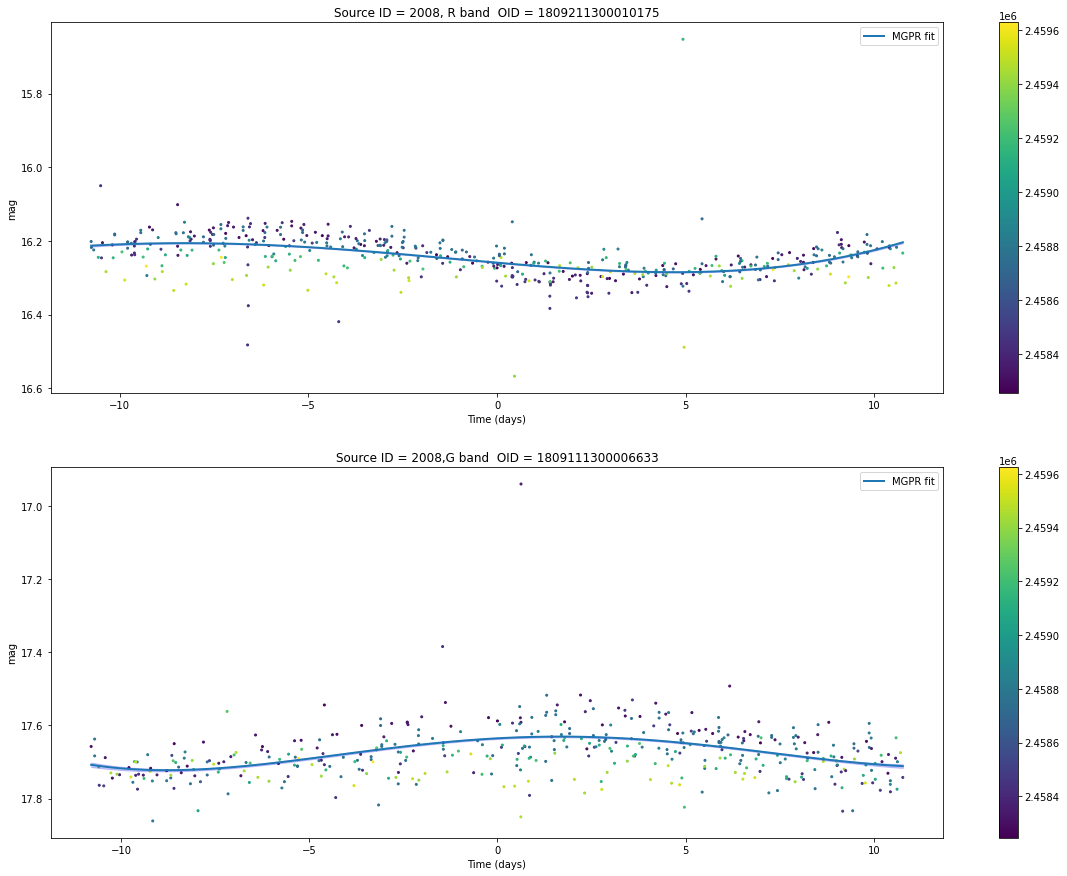

In [13]:
for i,row in enumerate(obj_zr):
    functions.MGPRfit(row['SourceID'],force_period=obj_zr['period'][i])

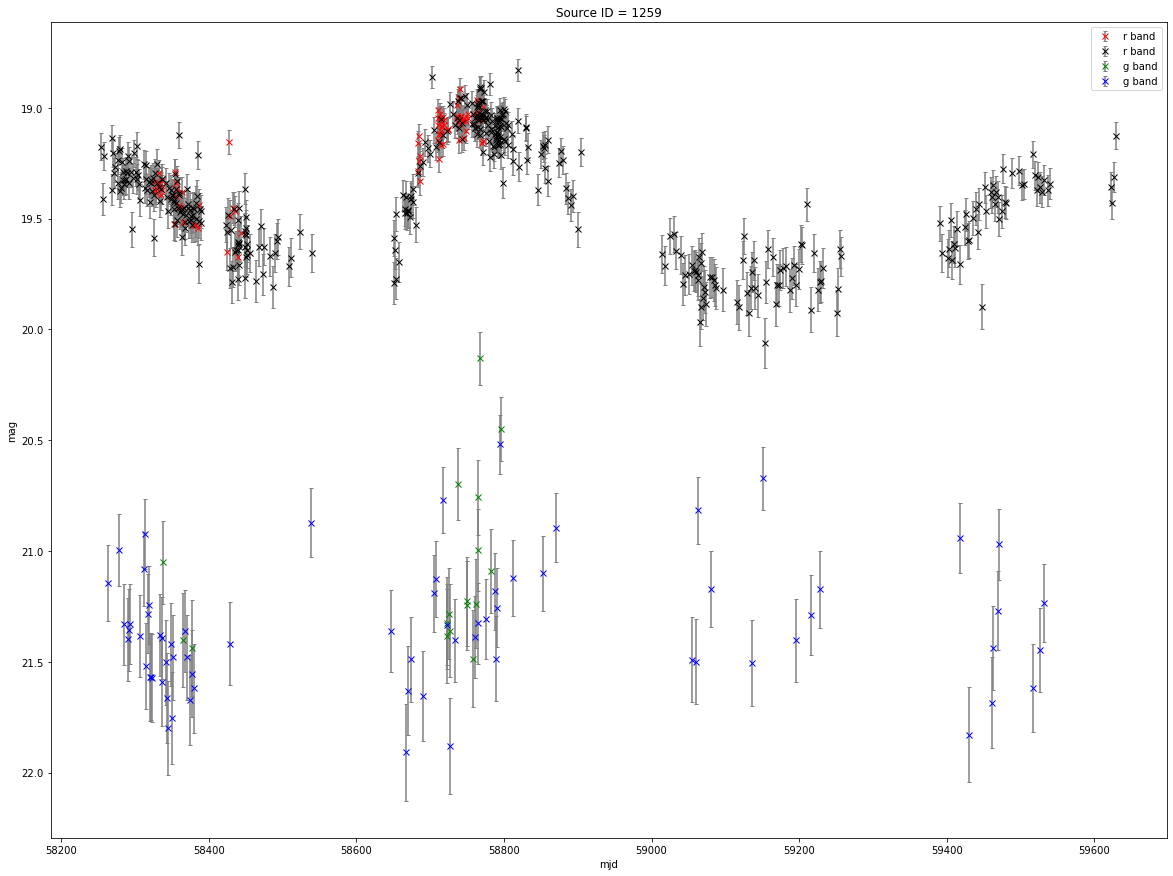

In [15]:
functions.draw_lightcurve(1259)

In [46]:
functions.query(1259)

<QTable length=2>
SourceID filter       OID        ... upsilon_flag   upsilon_period  
 int32    str2       str16       ...   float64         float64      
-------- ------ ---------------- ... ------------ ------------------
    1259     zr 1809211300054323 ...          1.0 1331.7022916999922
    1259     zr  806203100052030 ...          0.0  642.8628877500013

<QTable length=2>
SourceID filter       OID        ... upsilon_flag    upsilon_period   
 int32    str2       str16       ...   float64          float64       
-------- ------ ---------------- ... ------------ --------------------
    1259     zg 1809111300028563 ...          1.0  0.05262031910418057
    1259     zg  806103100019841 ...          1.0 0.059919348327793366

No data found in R band


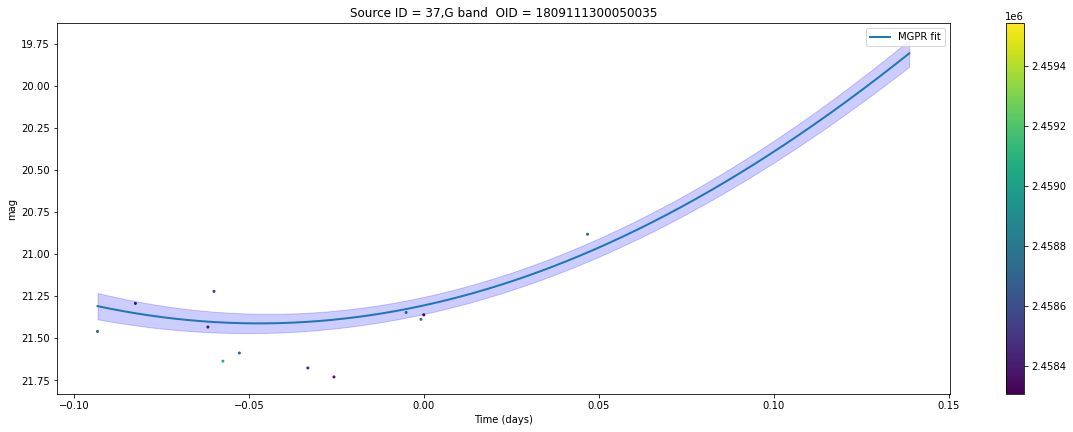

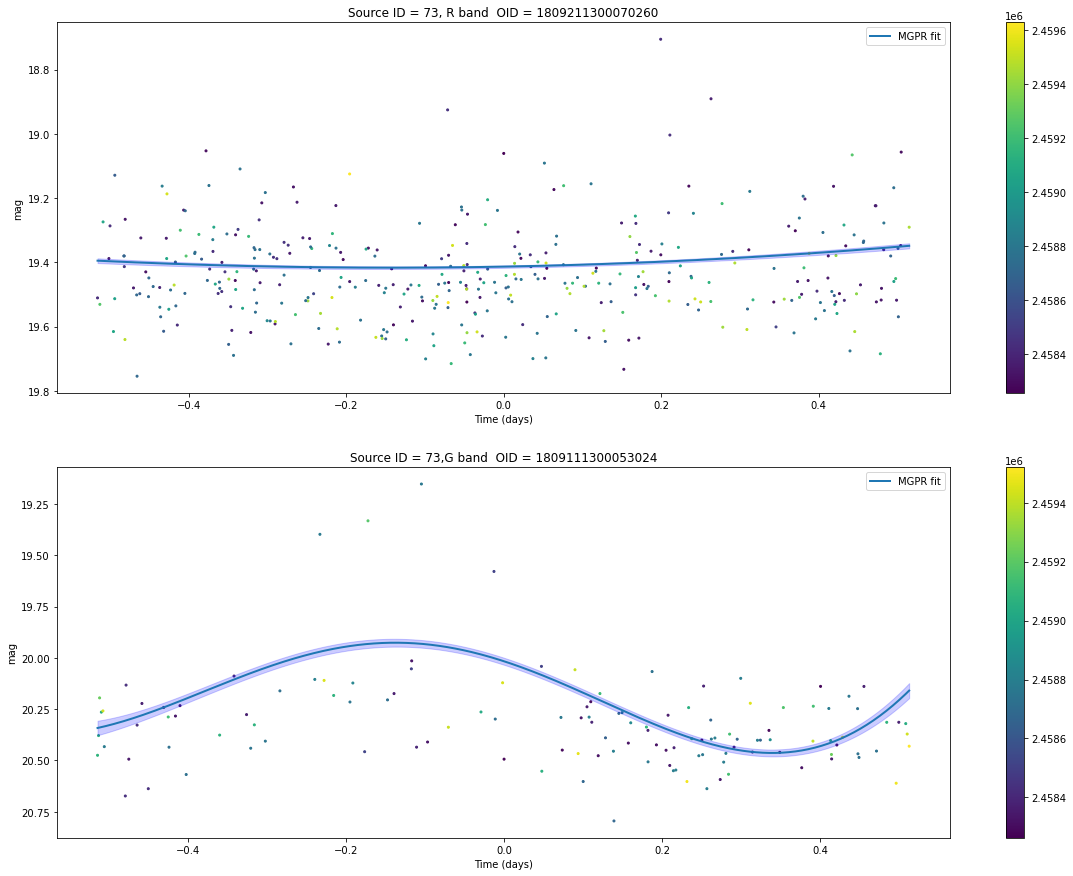

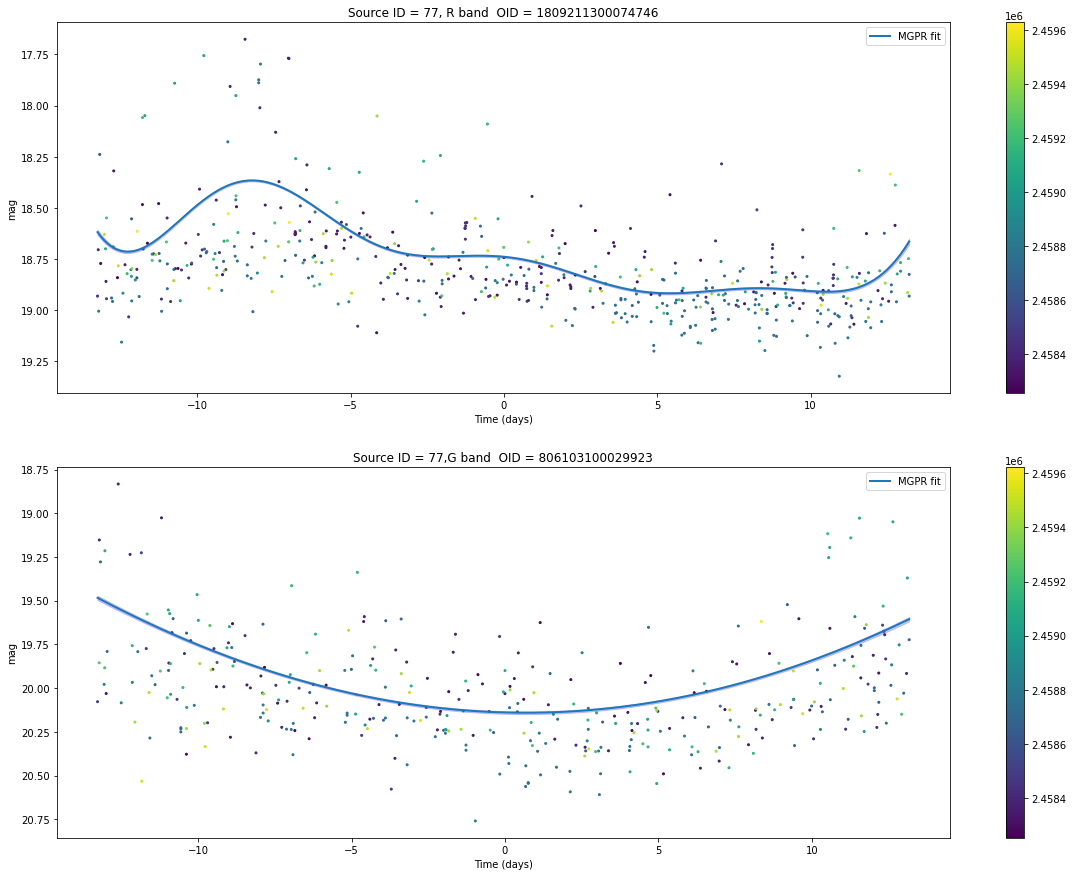

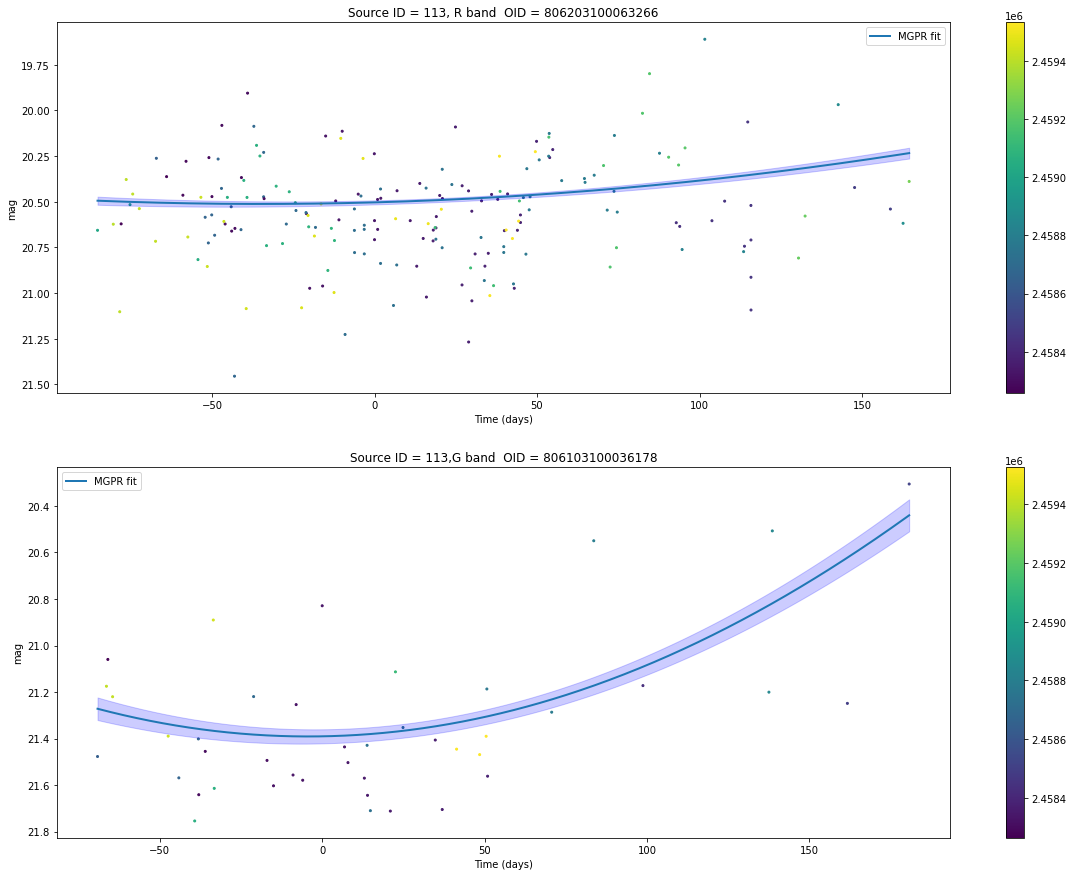

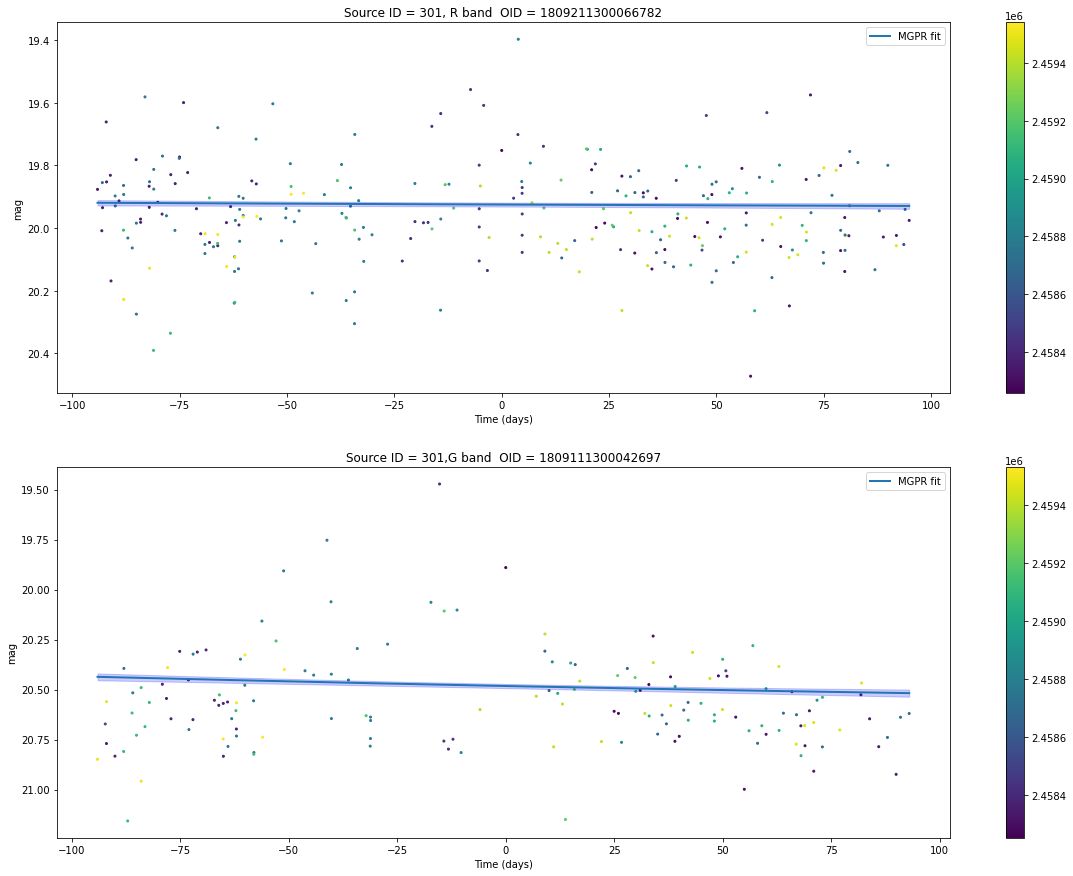

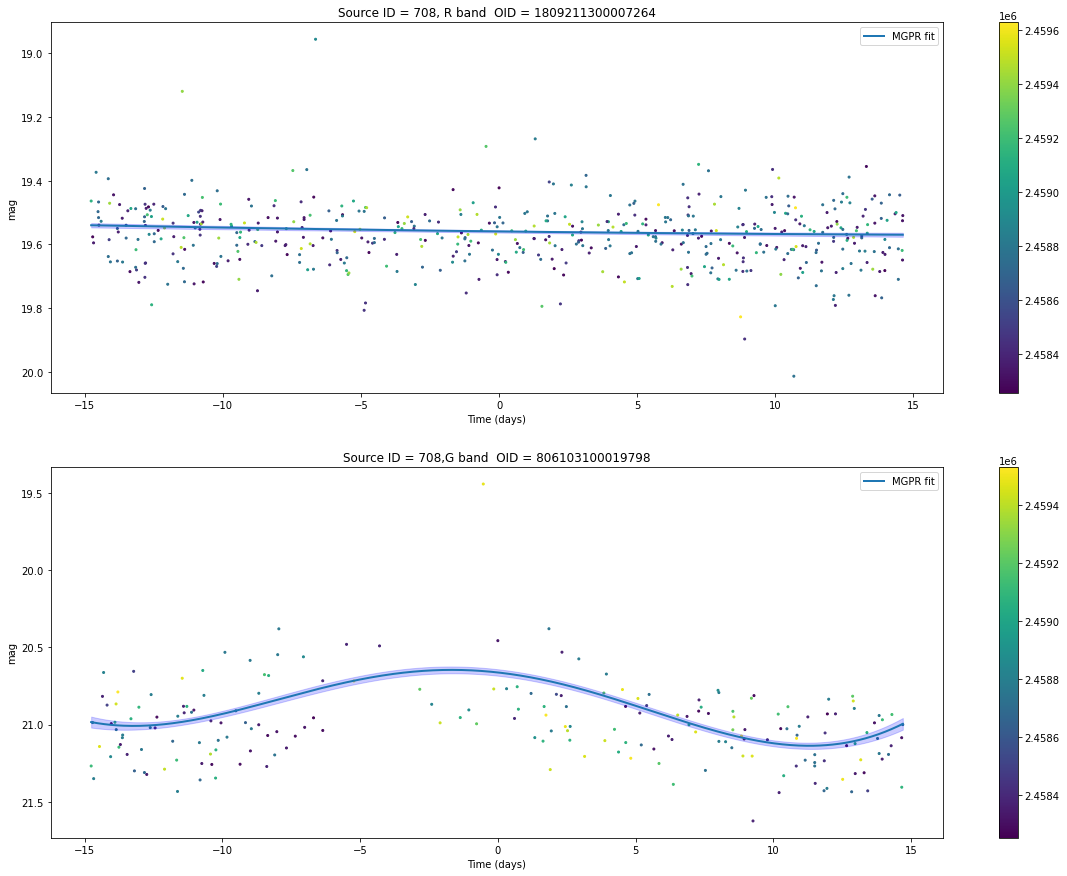

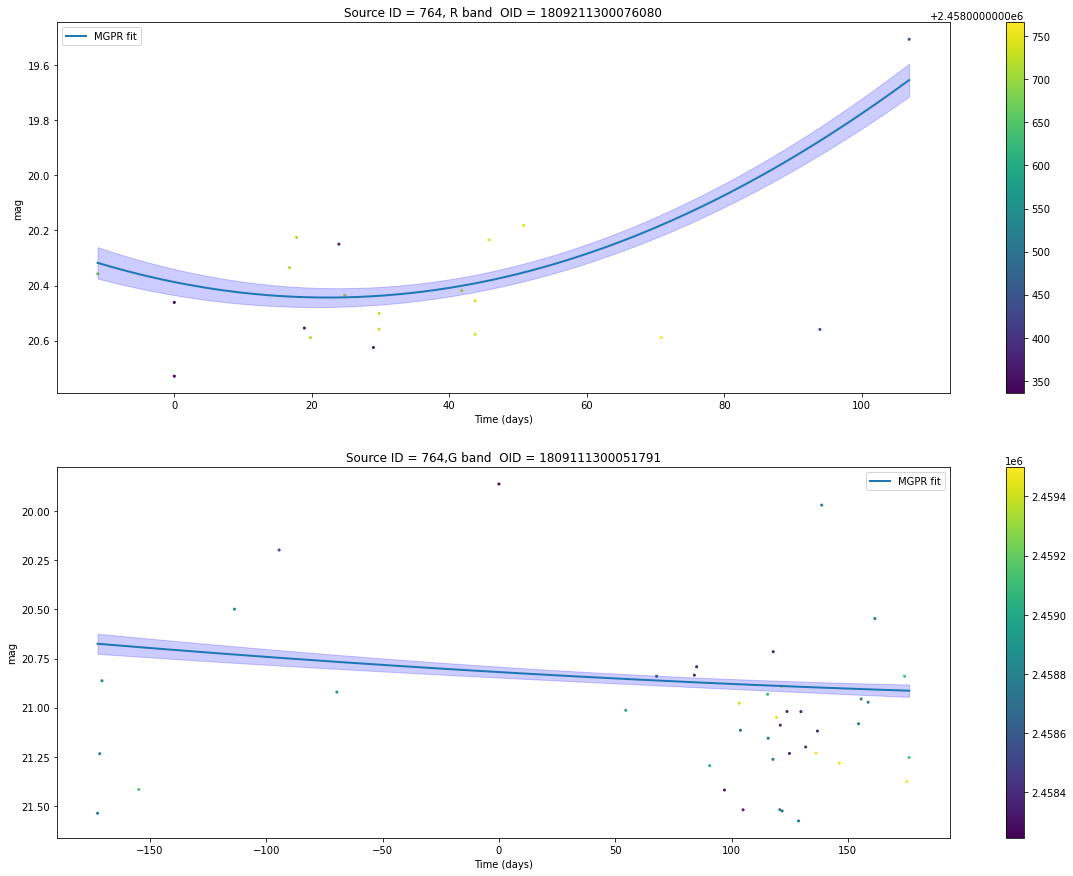

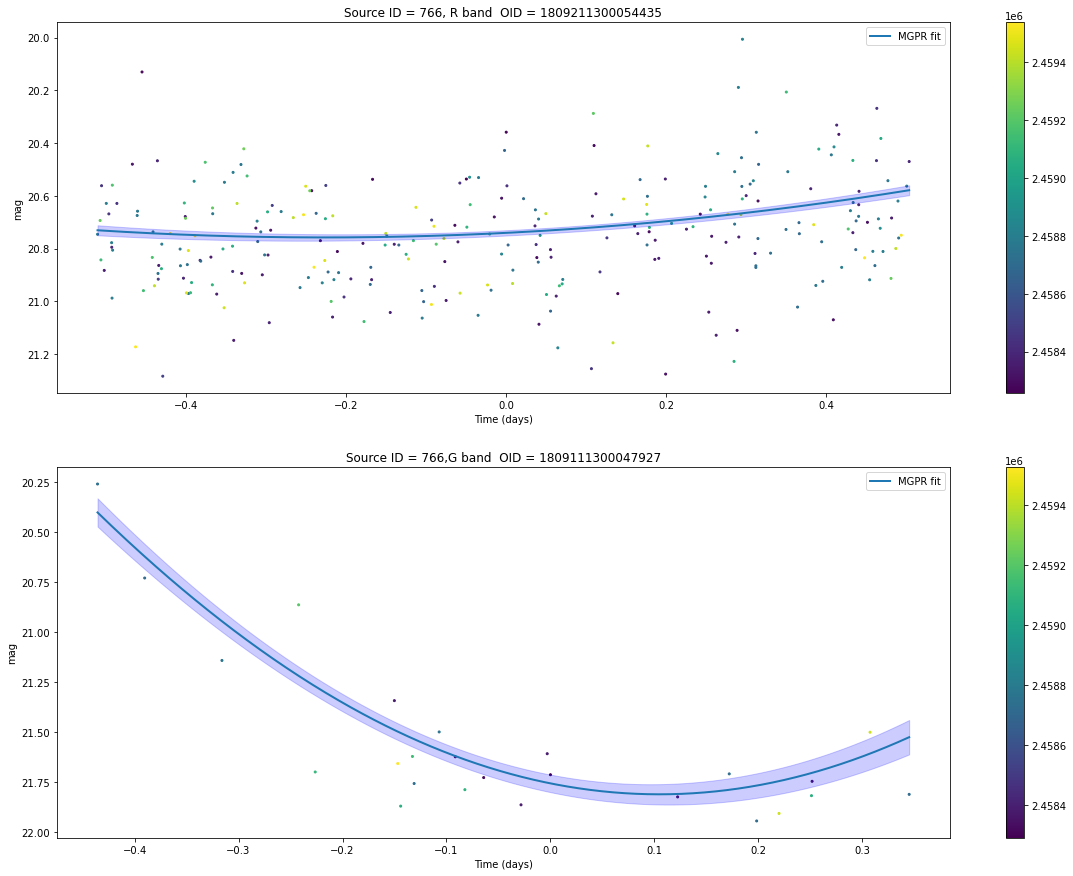

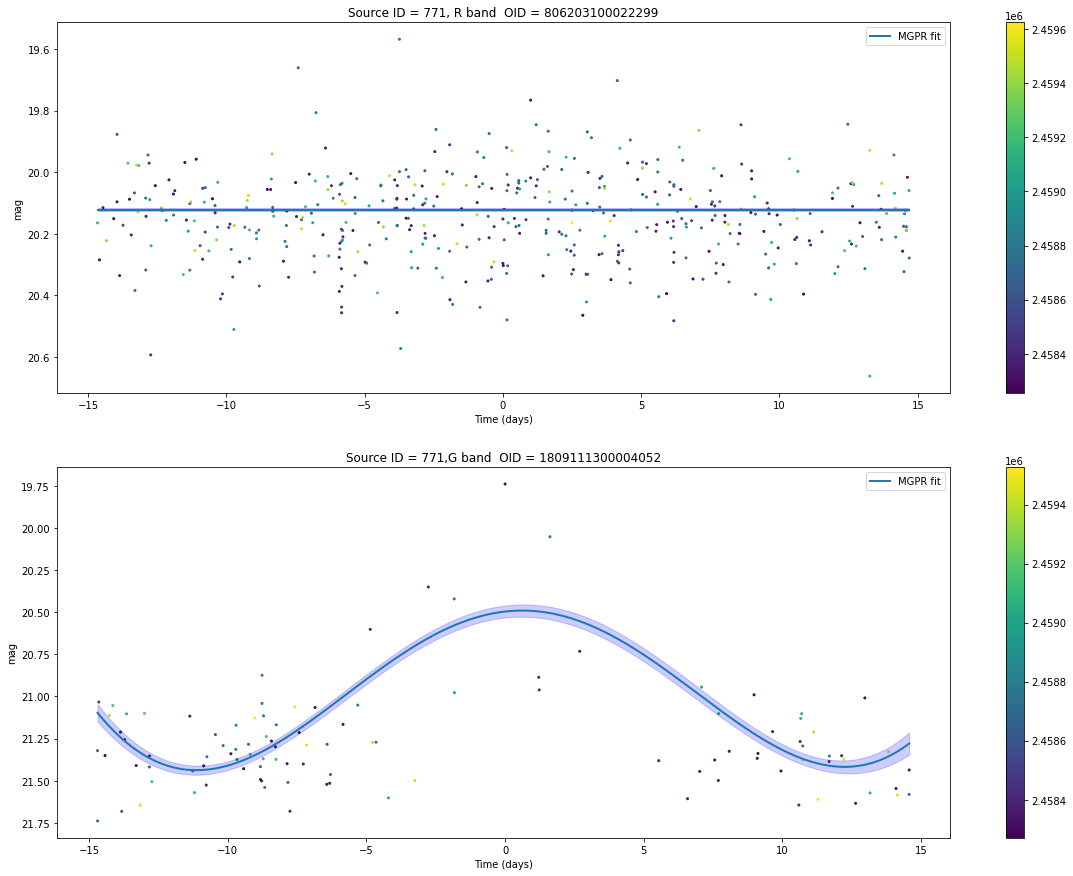

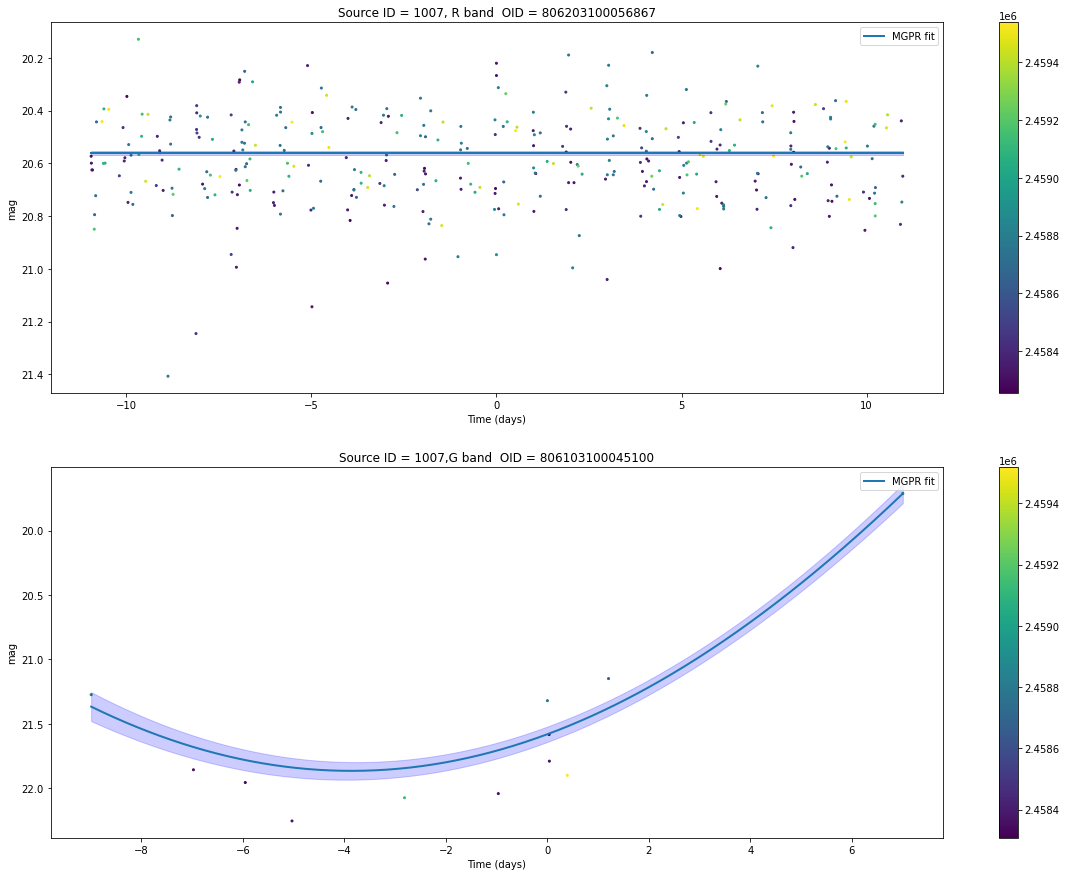

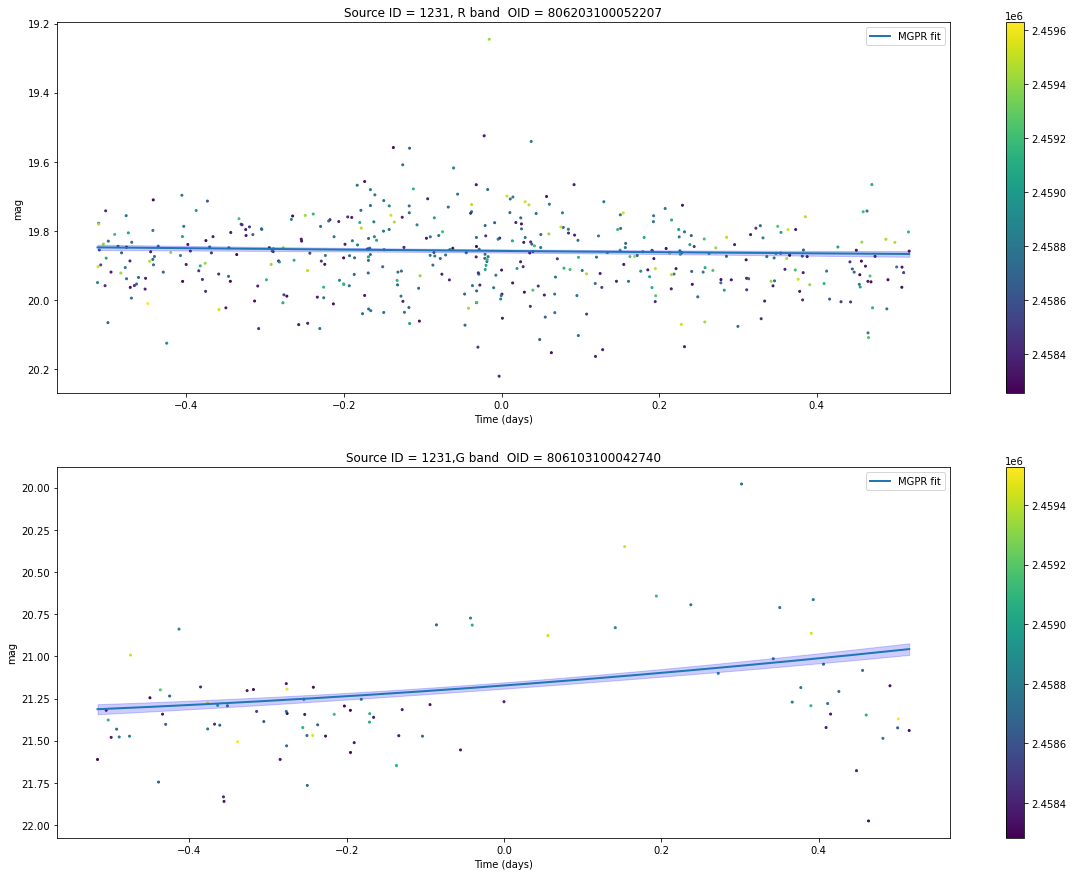

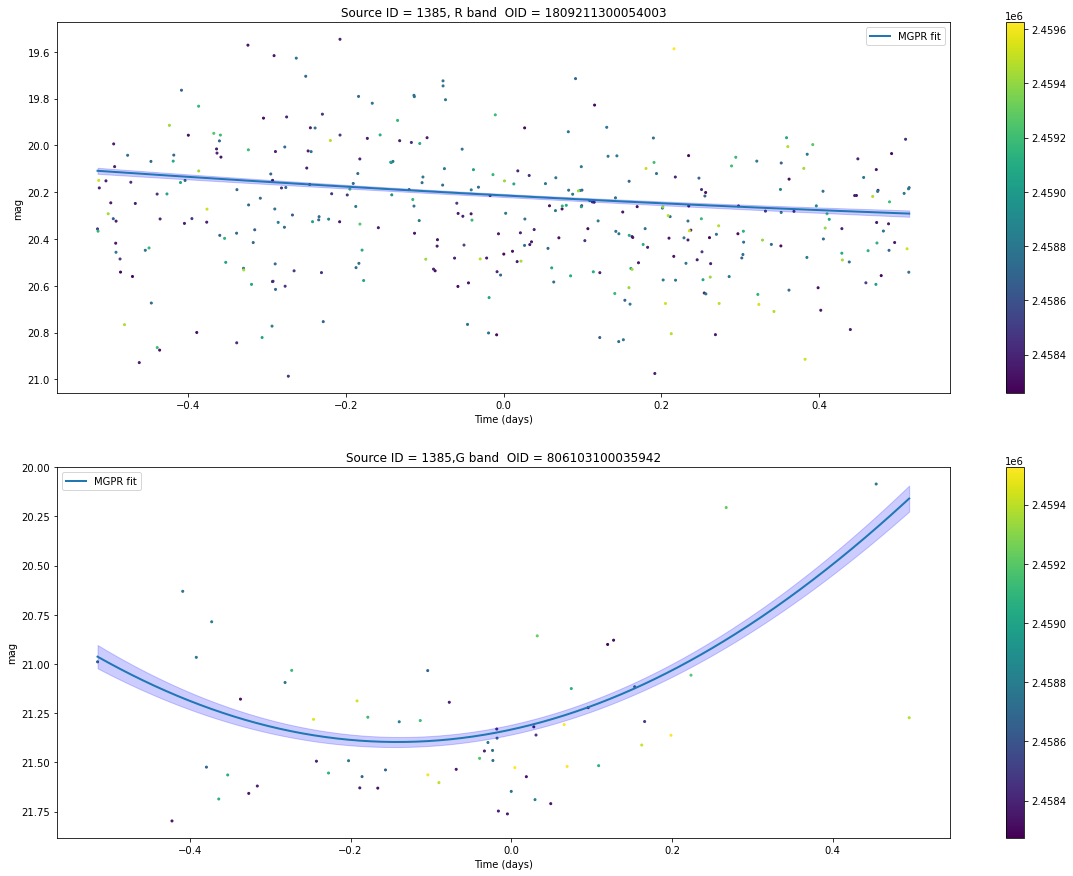

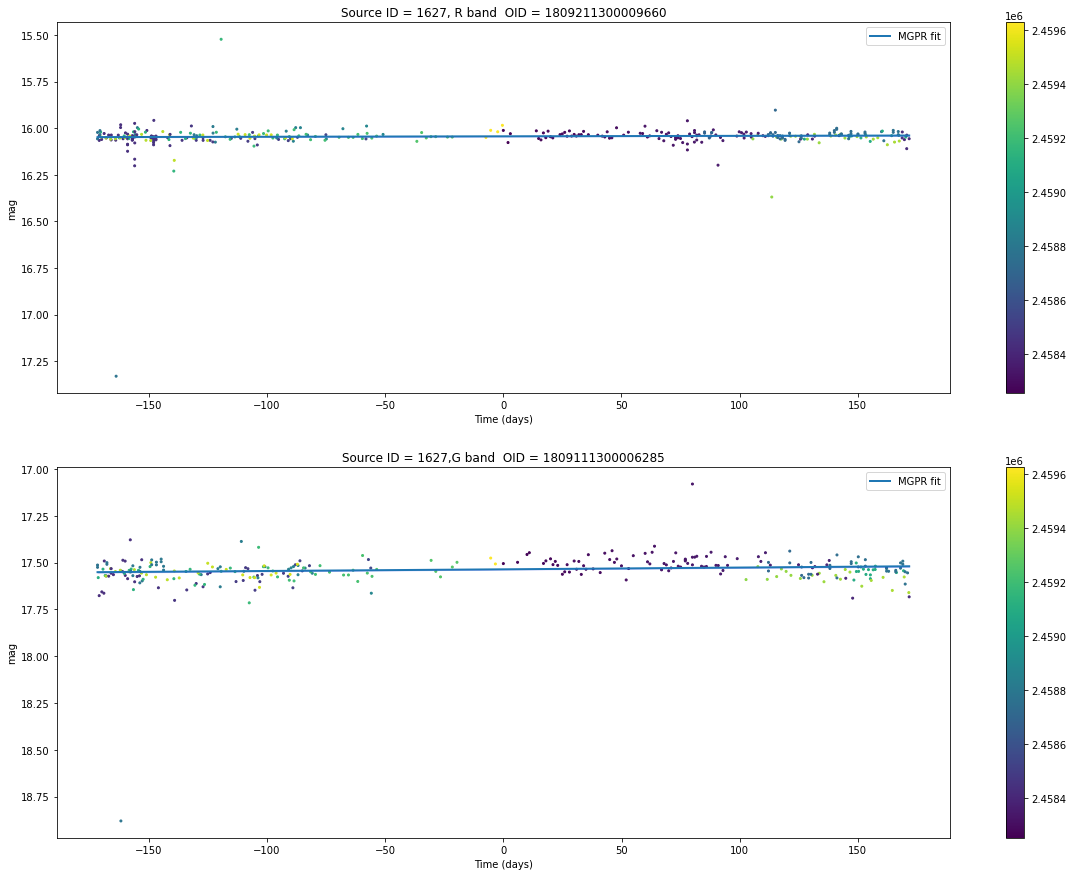

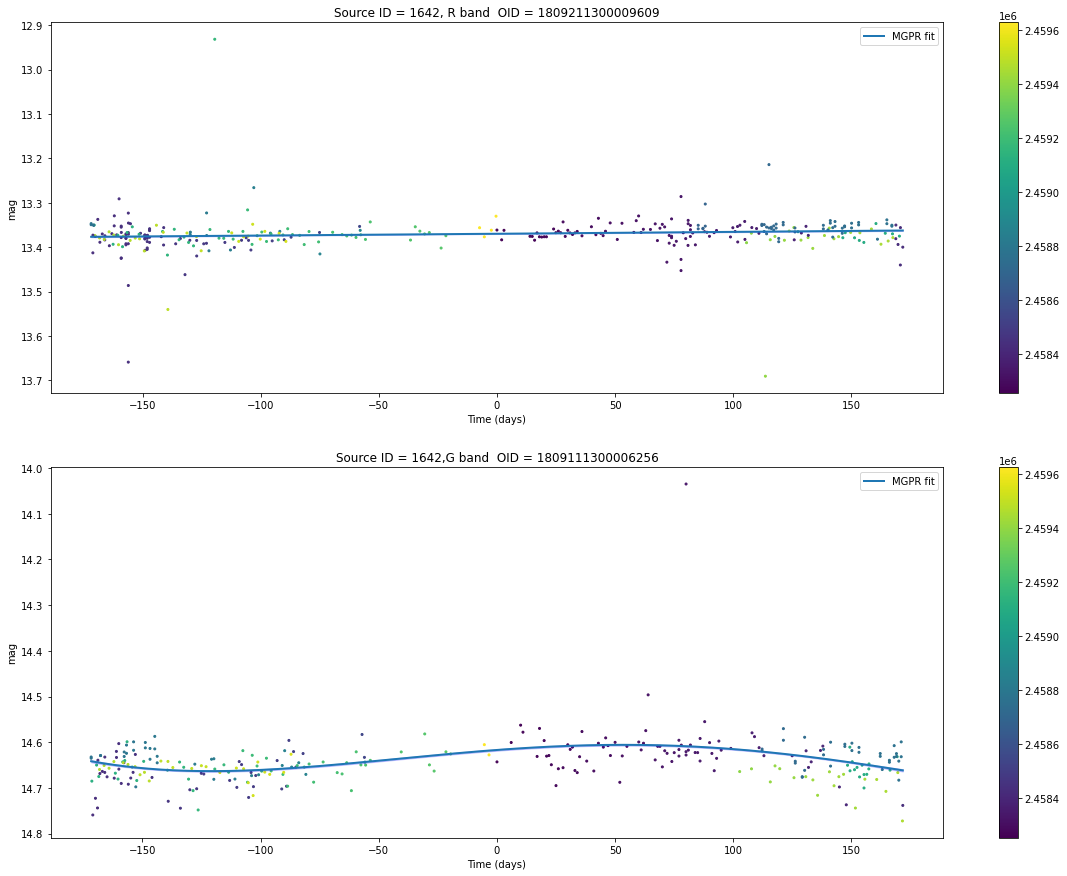

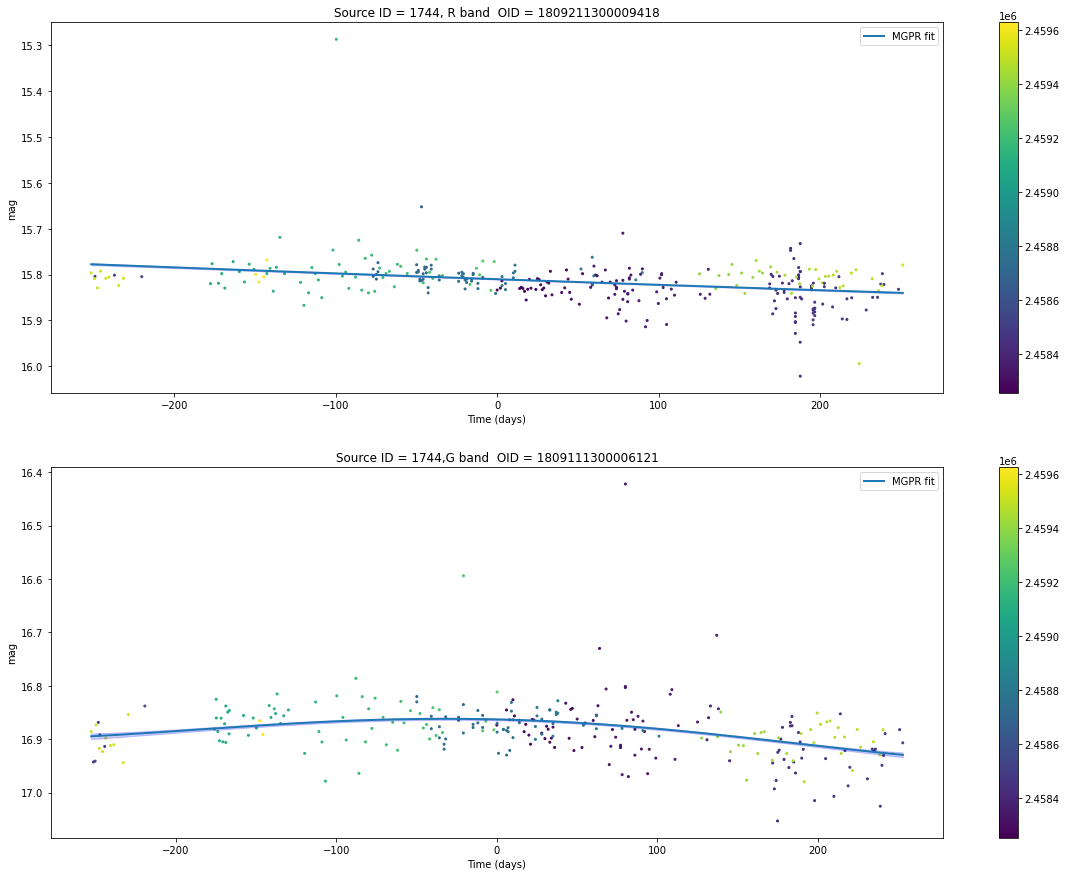

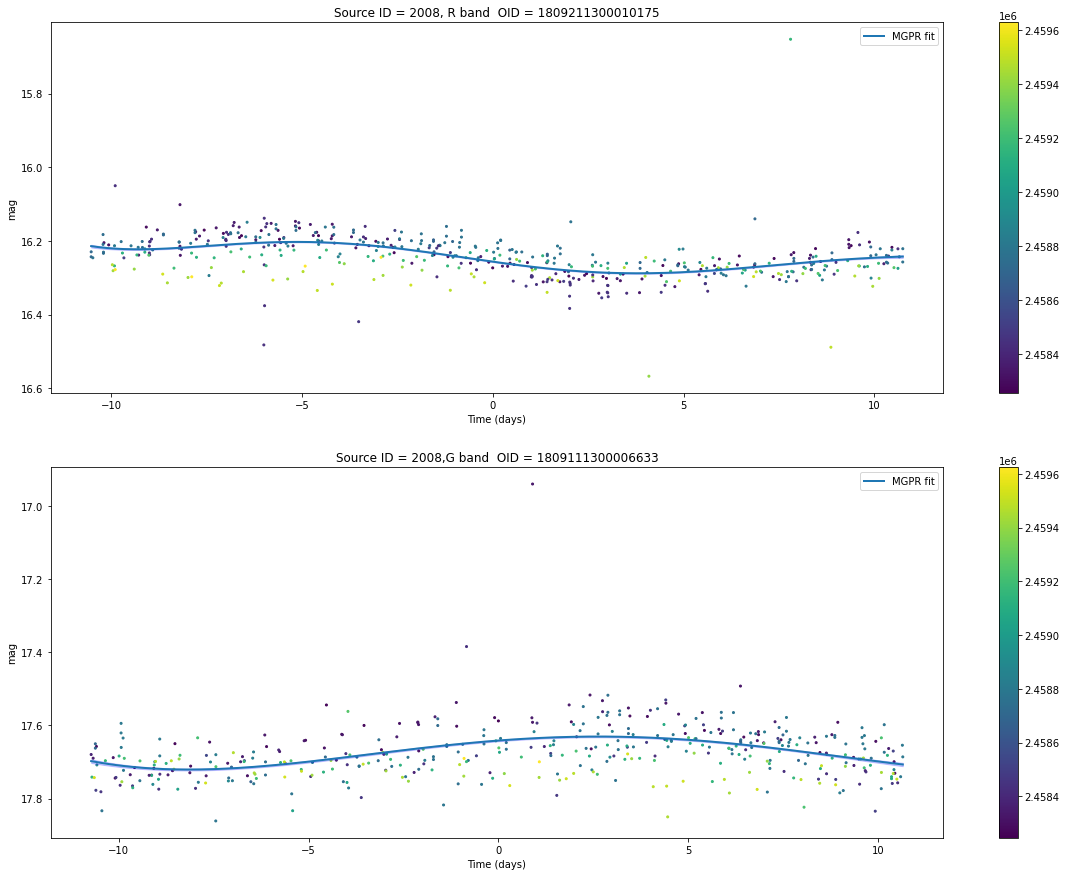

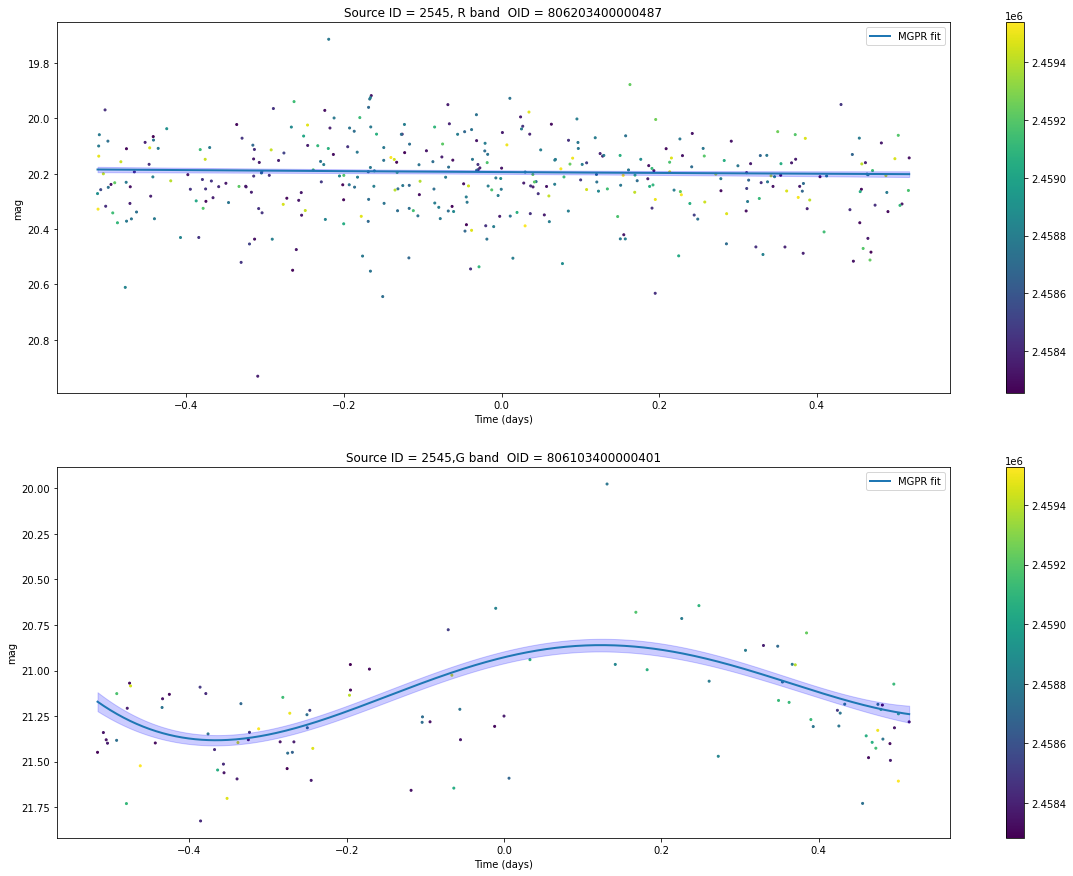

In [14]:
for i,row in enumerate(obj_zg):
    functions.MGPRfit(row['SourceID'],force_period=obj_zg['period'][i])

In [22]:
functions.query(1007)

<QTable length=2>
SourceID filter       OID        ... upsilon_flag    upsilon_period  
 int32    str2       str16       ...   float64          float64      
-------- ------ ---------------- ... ------------ -------------------
    1007     zr 1809211300061804 ...          1.0 0.14152336129240703
    1007     zr  806203100056867 ...          1.0  1.0351037090640143

<QTable length=2>
SourceID filter       OID        ... upsilon_flag    upsilon_period  
 int32    str2       str16       ...   float64          float64      
-------- ------ ---------------- ... ------------ -------------------
    1007     zg 1809111300047864 ...          nan                 nan
    1007     zg  806103100045100 ...          1.0 0.04470060166272526

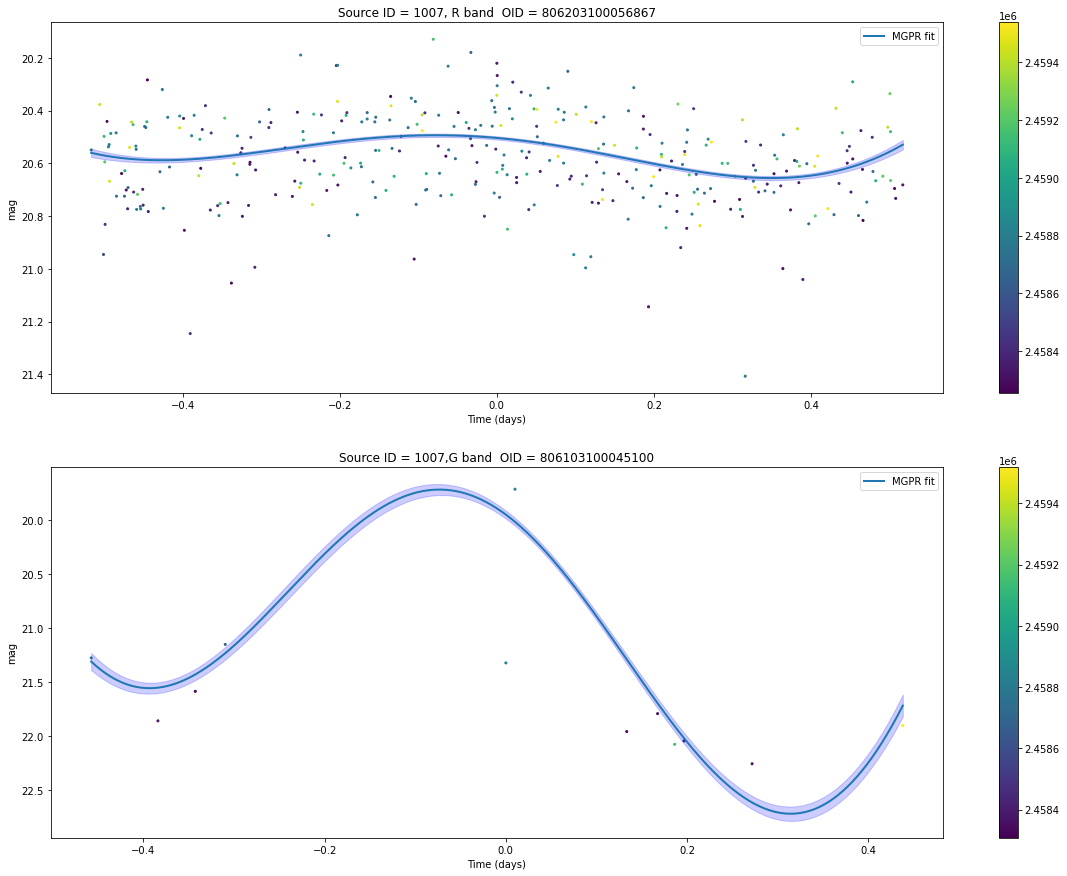

In [27]:
functions.MGPRfit(1007,force_period=1.0350997577974475,errscale=0.5)

In [39]:
t_zr[(t_zr['CONST_CHI2']>100)&(t_zr['numobs']>100)]

<QTable length=6>
SourceID filter       OID       ... upsilon_flag    upsilon_period  
 int32    str2       str16      ...   float64          float64      
-------- ------ --------------- ... ------------ -------------------
      42     zr 806203100023517 ...          1.0 0.04157537641950494
      90     zr 806203100056957 ...          0.0   1928.588663250004
    1891     zr 806203100056801 ...          1.0  0.9946305638215595
    1903     zr 806203400030775 ...          1.0 0.16738727436276674
    2032     zr 806203400030910 ...          0.0   1928.588663250004
    6962     zr 806203400051460 ...          1.0  1909.2845833499996

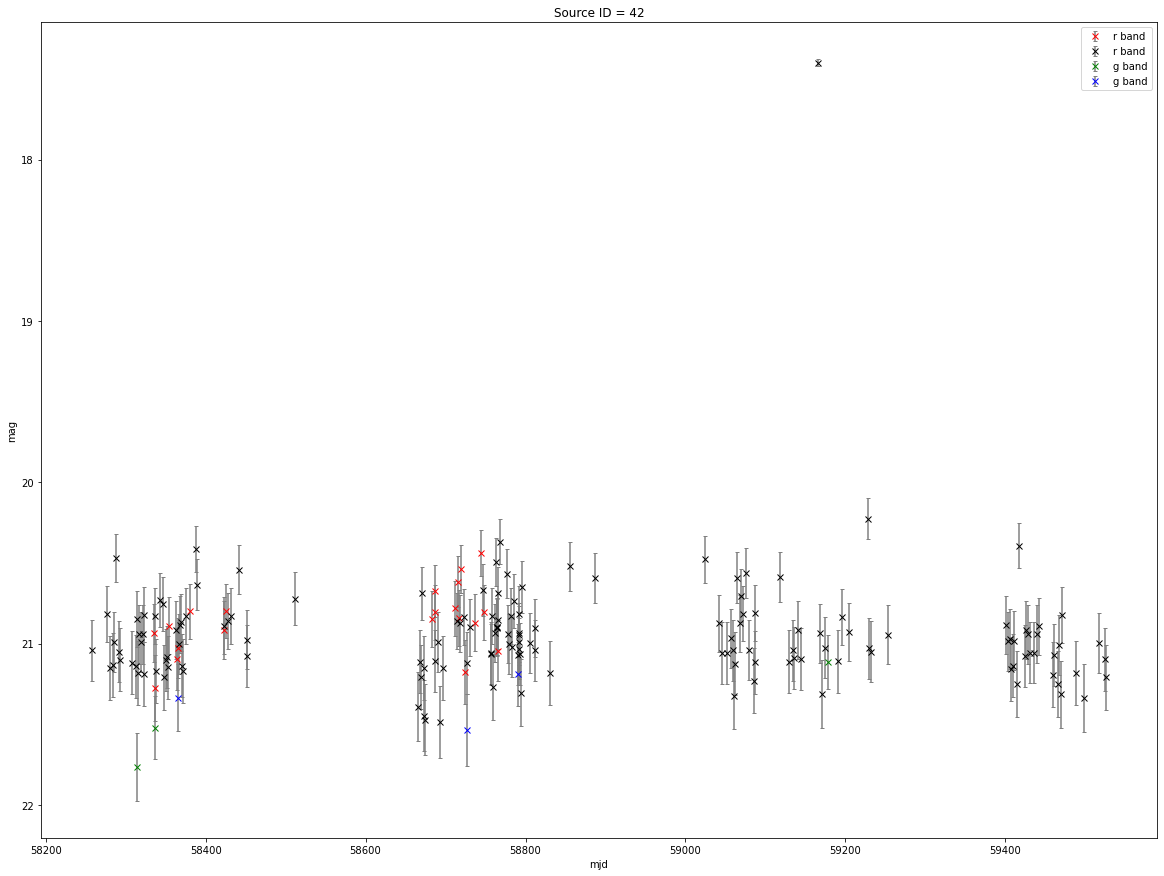

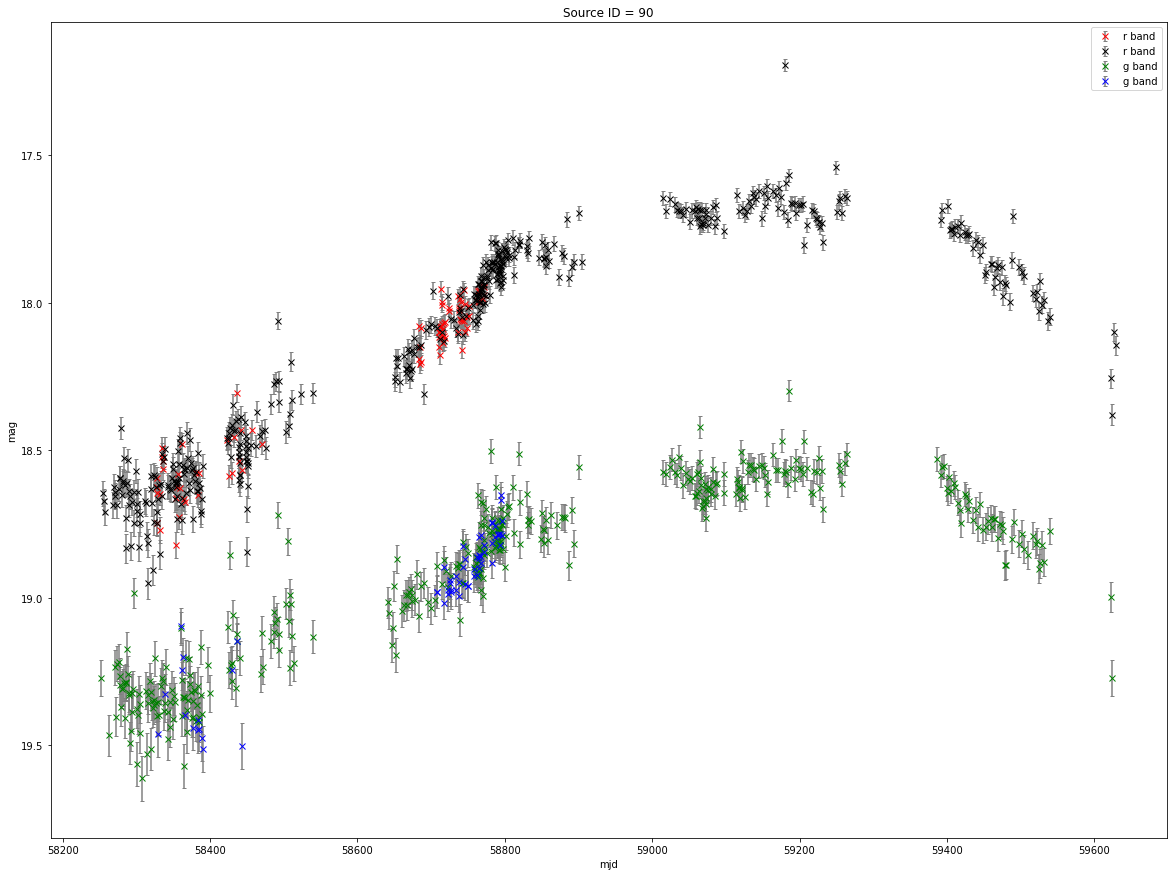

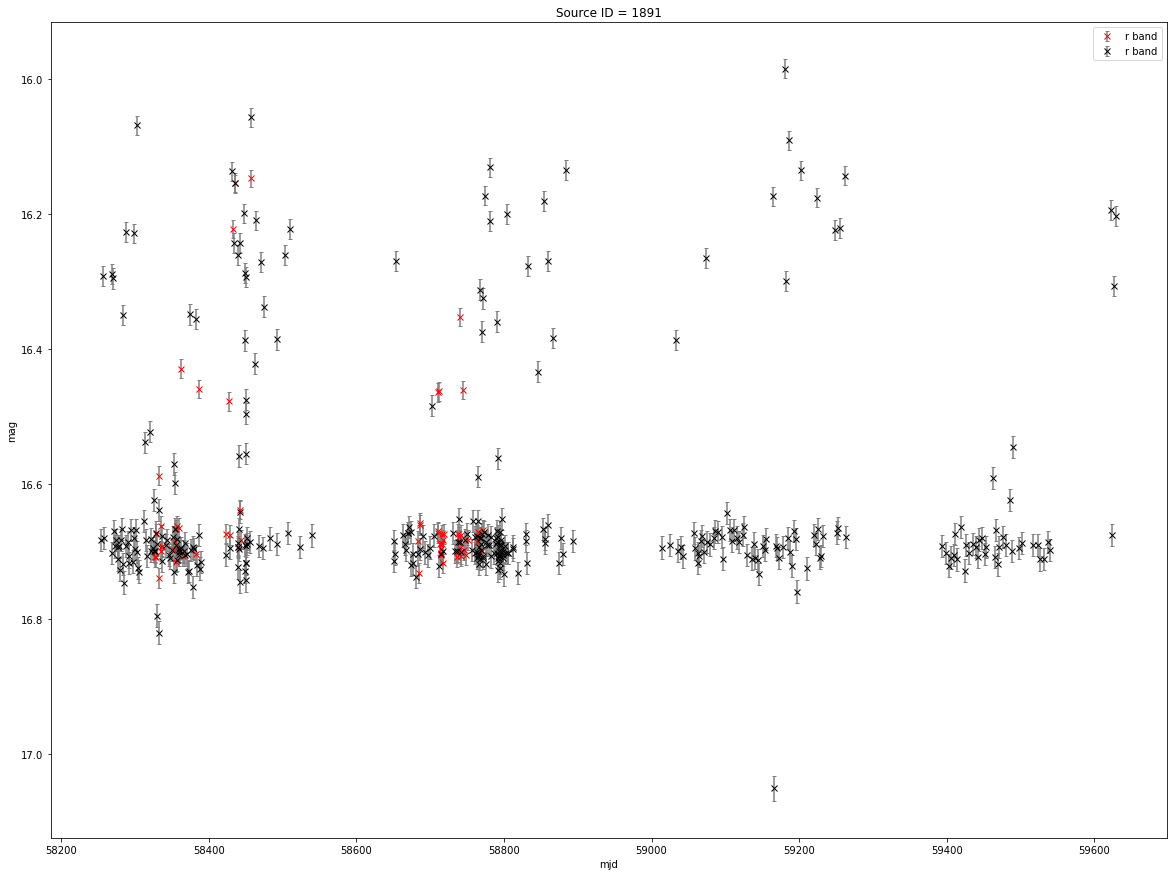

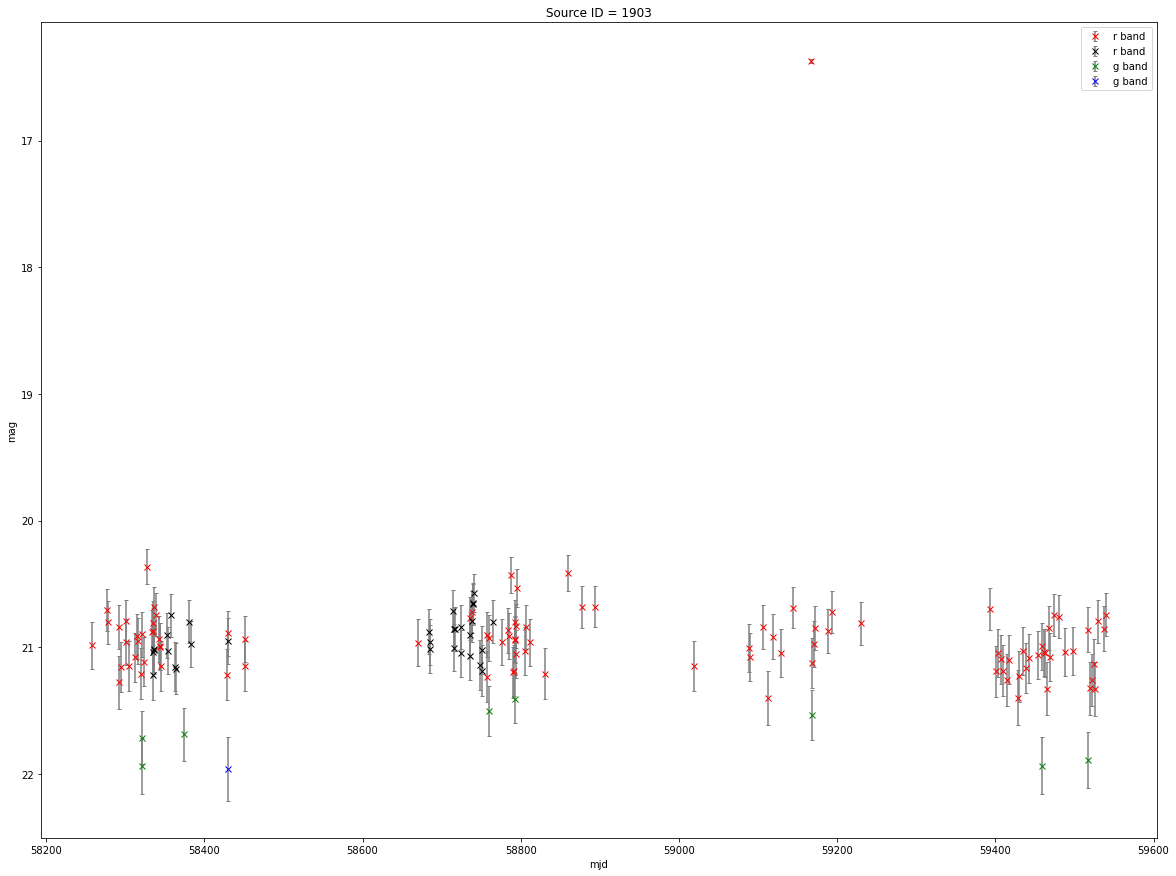

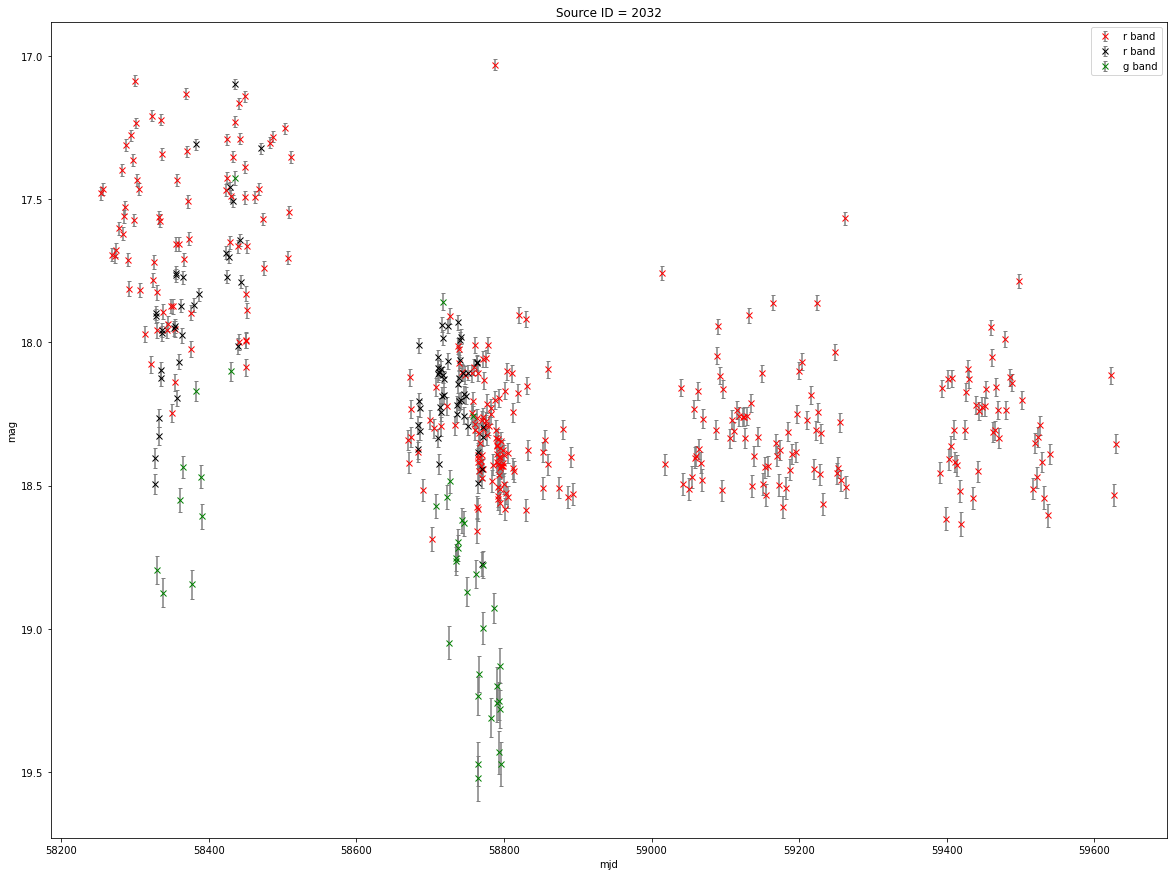

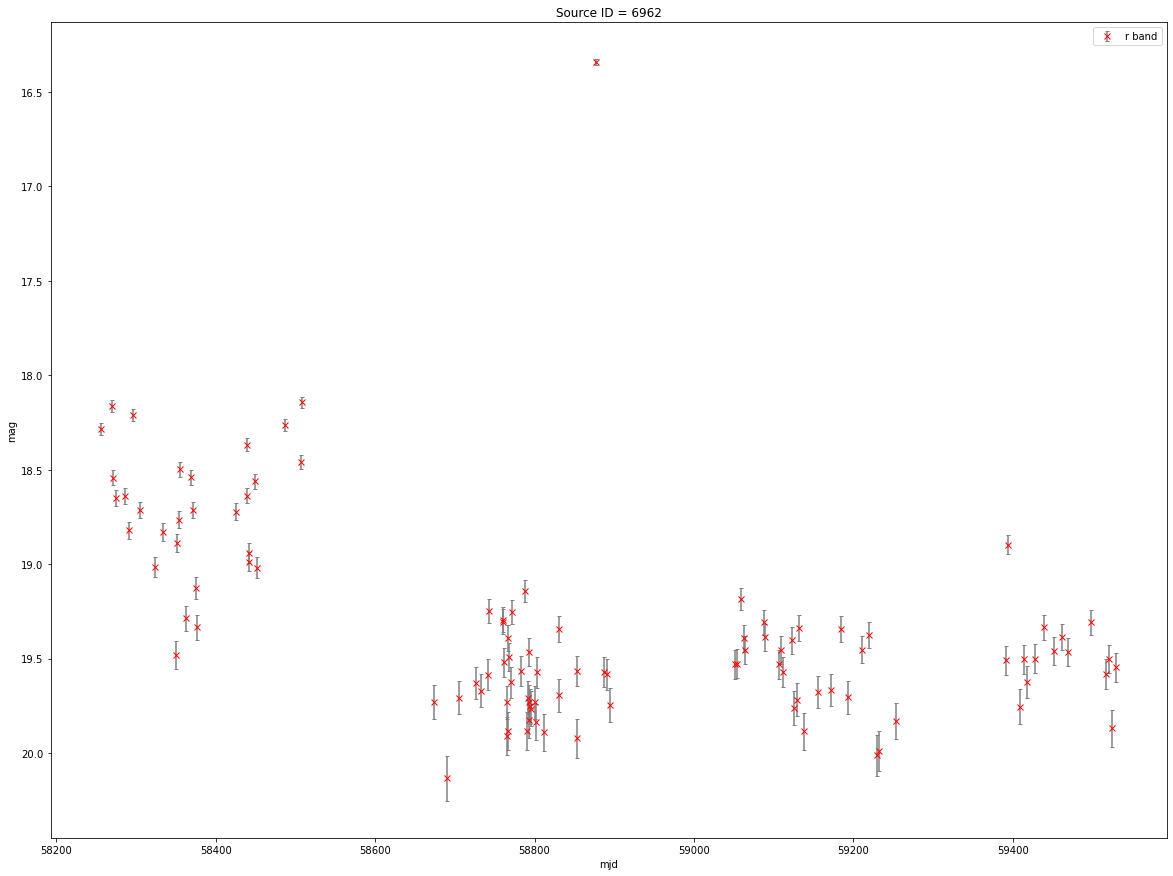

In [40]:
for row in t_zr[(t_zr['CONST_CHI2']>100)&(t_zr['numobs']>100)]:
    functions.draw_lightcurve(row['SourceID'])

In [42]:
t_zg[(t_zg['CONST_CHI2']>10)&(t_zg['numobs']>100)]

<QTable length=7>
SourceID filter       OID       ... upsilon_flag    upsilon_period   
 int32    str2       str16      ...   float64          float64       
-------- ------ --------------- ... ------------ --------------------
      77     zg 806103100029923 ...          0.0    26.64318238750002
      79     zg 806103100049853 ...          1.0 0.061830210054434245
      90     zg 806103100049624 ...          0.0   1931.8544443499993
     520     zg 806103100042755 ...          1.0  0.04759573179078138
     574     zg 806103100030003 ...          1.0   1.0026114901997356
    1951     zg 806103100030005 ...          1.0 0.030336410996228087
    2398     zg 806103100029877 ...          1.0 0.048474736545708594

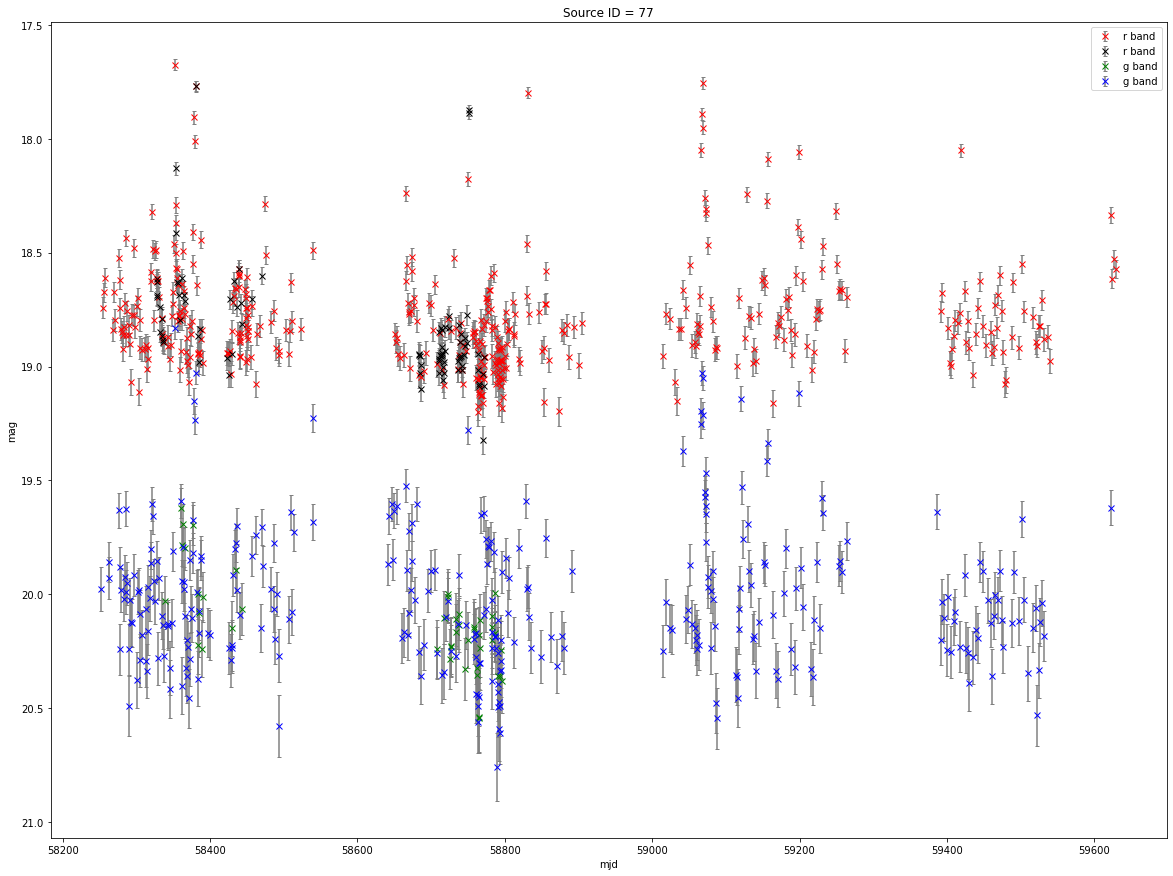

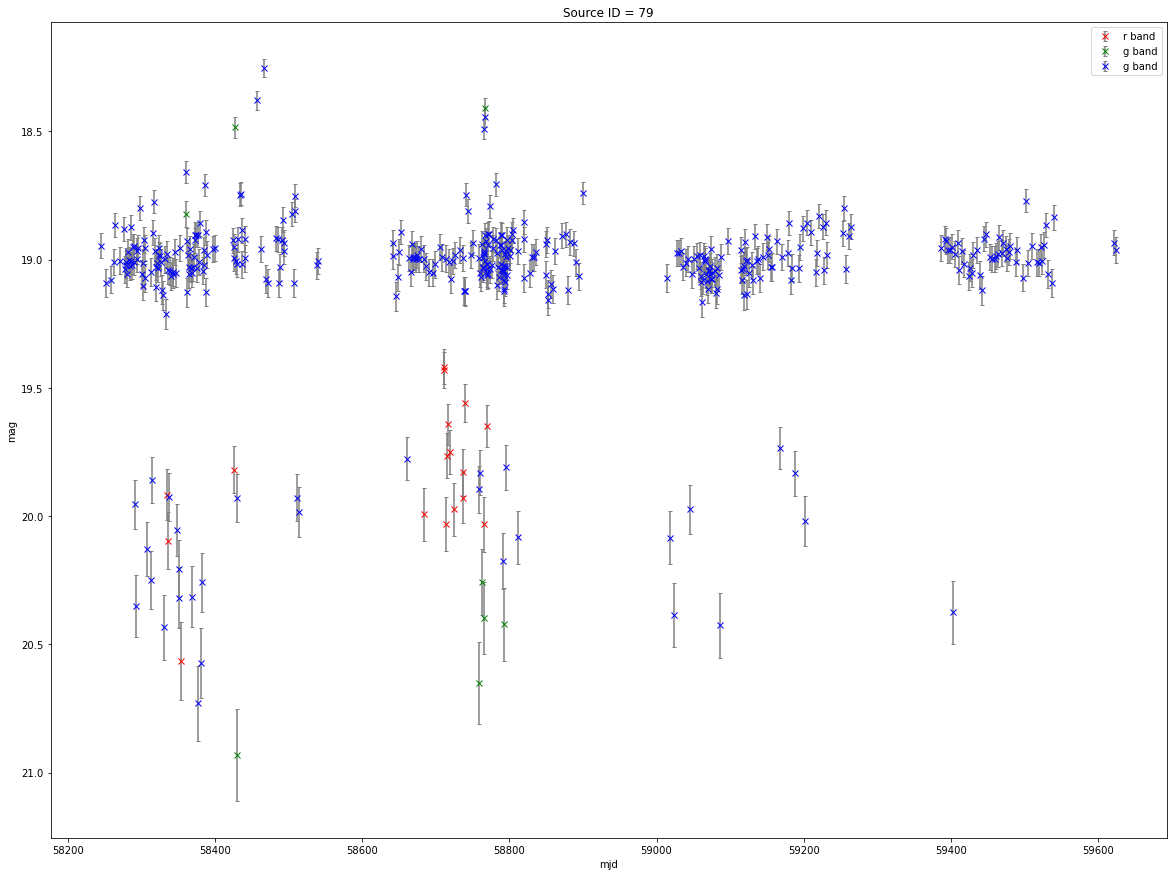

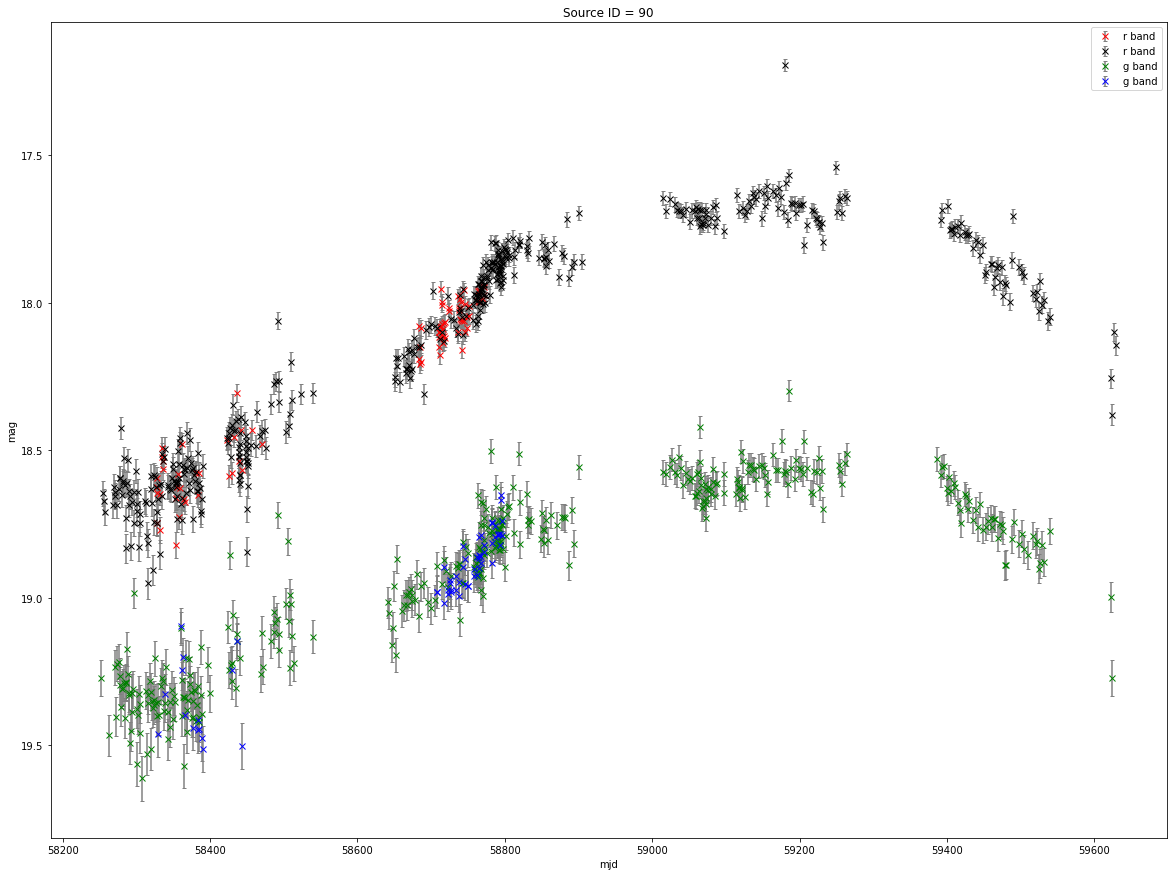

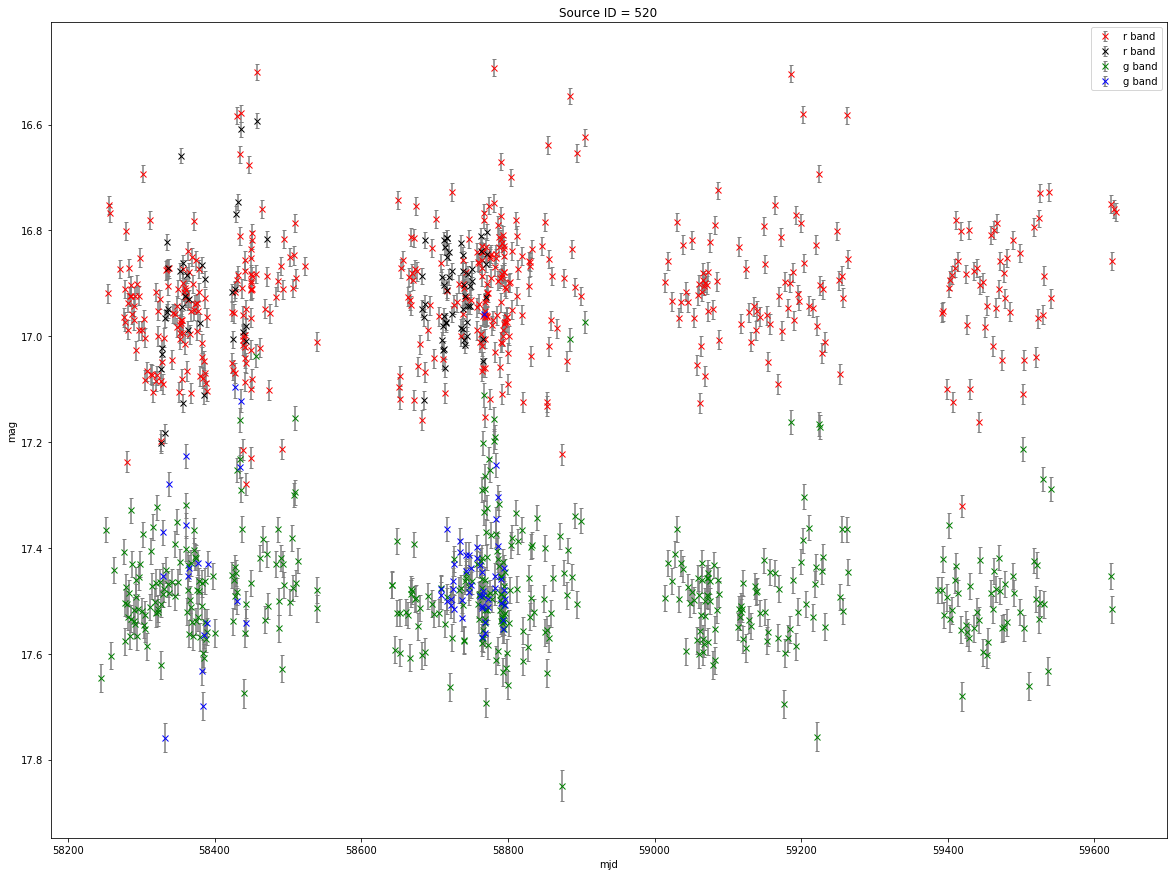

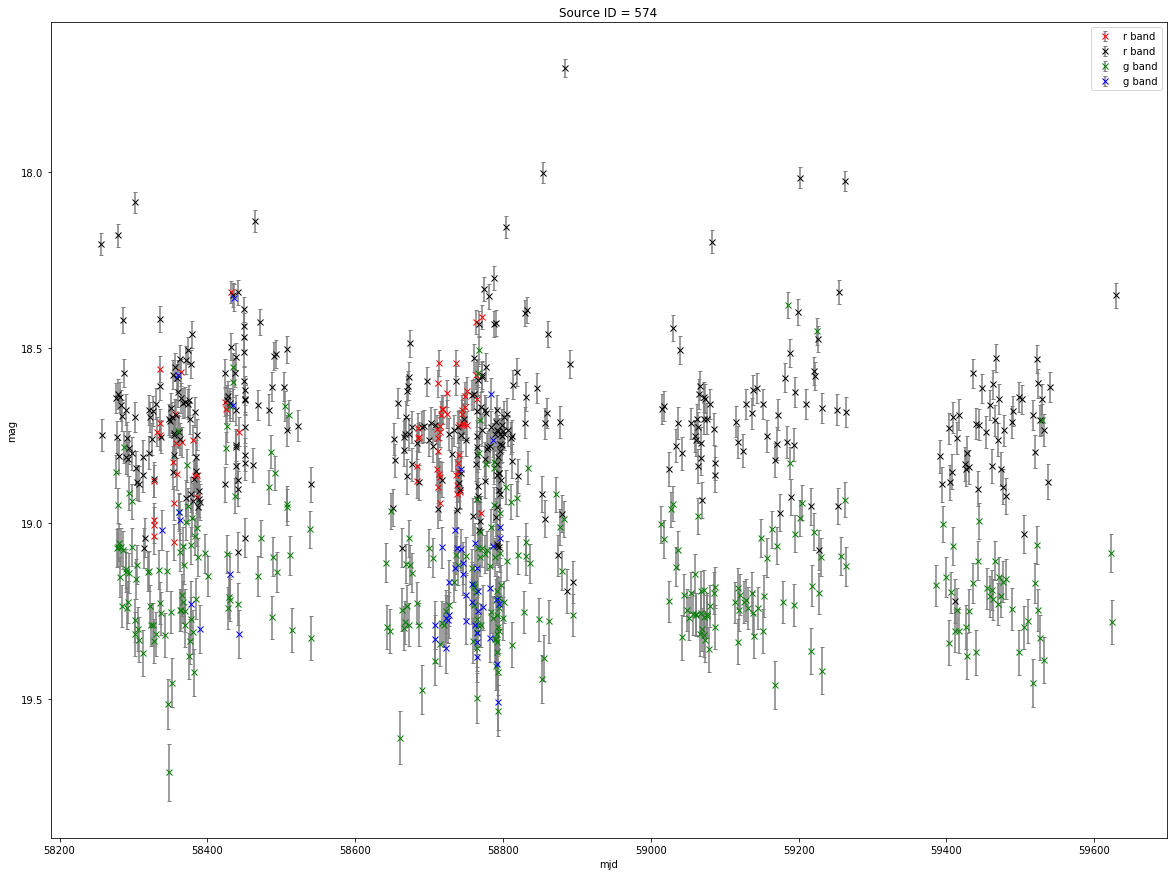

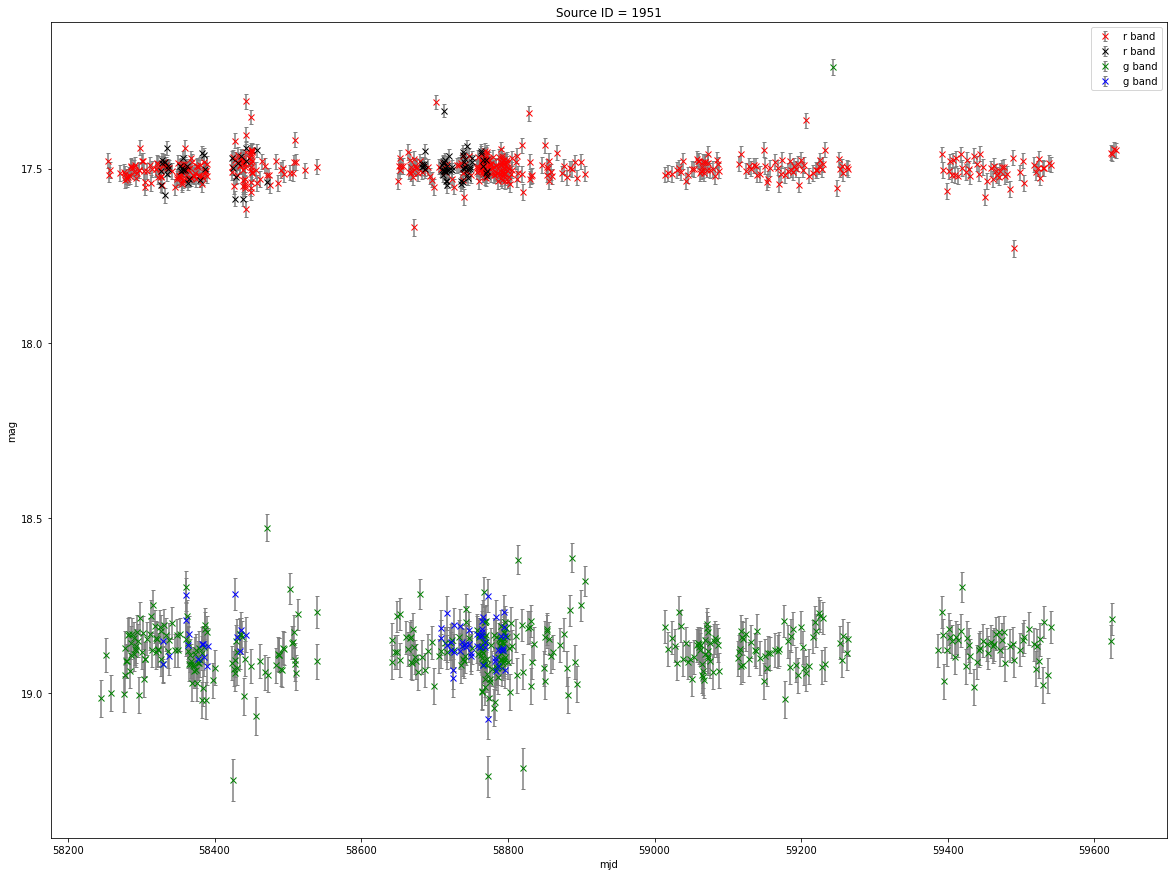

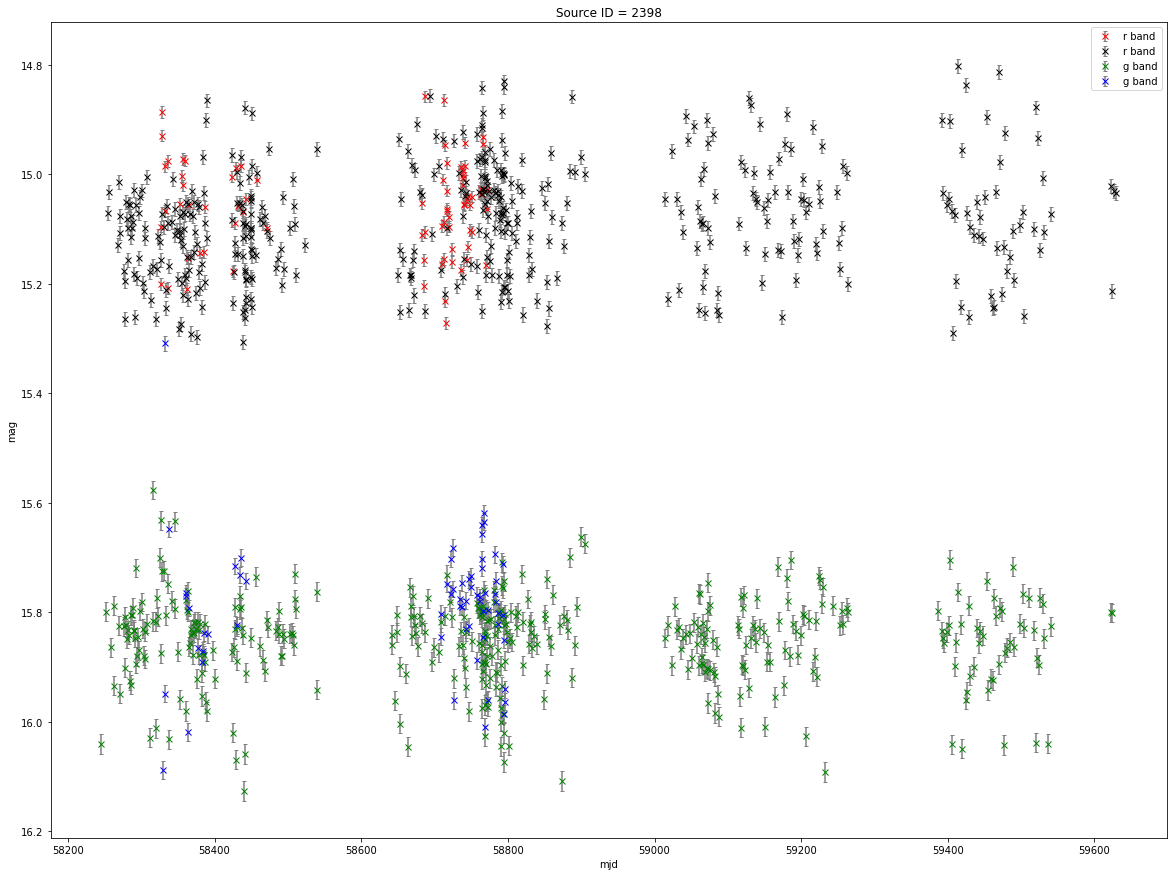

In [43]:
for row in t_zg[(t_zg['CONST_CHI2']>10)&(t_zg['numobs']>100)]:
    functions.draw_lightcurve(row['SourceID'])

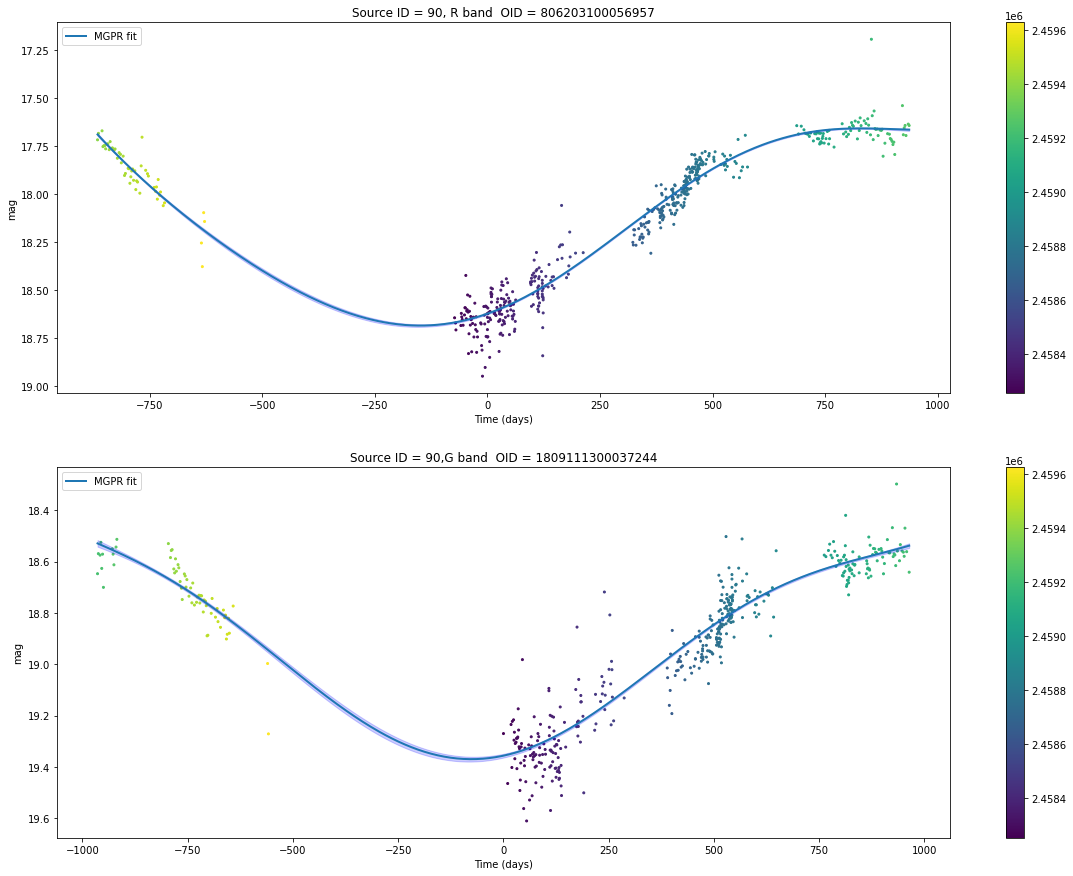

In [56]:
functions.MGPRfit(90,force_period=1930)

In [10]:
def combine(t_zr,t_zg,unique=np.array([np.nan])):
    zr=np.array(t_zr['SourceID'])
    zg=np.array(t_zg['SourceID'])
    if np.isnan(unique[0]):
        unique=np.unique(np.append(zg,zr))
    common=unique[(np.isin(unique,zr))&(np.isin(unique,zg))]
    t = QTable([common,np.full(len(common), np.nan),np.full(len(common), np.nan),np.empty(len(common),'S14'),np.empty(len(common),'S14'),np.full(len(common), np.nan),np.full(len(common), np.nan),np.full(len(common), np.nan),np.full(len(common), np.nan),np.full(len(common), np.nan),np.full(len(common), np.nan)]
               ,names=('SourceID', 'period_zr','period_zg','upsilon class_zr','upsilon class_zg','LNP_SIG_zr','LNP_SIG_zg','CONST_CHI2_zr','CONST_CHI2_zg','power_ratio_zr','power_ratio_zg'))
    
    for i,ID in enumerate(common):
        zr=t_zr[t_zr['SourceID']==ID]
        zr=zr[zr['numobs'].argmax()]
        zg=t_zg[t_zg['SourceID']==ID]
        zg=zg[zg['numobs'].argmax()]
        
        t[i]['period_zr']=zr['period']
        t[i]['period_zg']=zg['period']
        t[i]['upsilon class_zr']=zr['upsilon_class']
        t[i]['upsilon class_zg']=zg['upsilon_class']
        t[i]['LNP_SIG_zr']=zr['LNP_SIG']
        t[i]['LNP_SIG_zg']=zg['LNP_SIG']
        t[i]['CONST_CHI2_zr']=zr['CONST_CHI2']
        t[i]['CONST_CHI2_zg']=zg['CONST_CHI2']
        t[i]['power_ratio_zr']=zr['power']/zr['power_c']
        t[i]['power_ratio_zg']=zg['power']/zg['power_c']
           
    return t

In [11]:
common_all=combine(t_zr,t_zg)
common_var=combine(t_zr,t_zg,unique=np.unique(np.append(np.array(obj_zr['SourceID']),np.array(obj_zg['SourceID']))))

In [12]:
common_var

<QTable length=21>
SourceID      period_zr      ...    power_ratio_zr     power_ratio_zg  
 int32         float64       ...       float64            float64      
-------- ------------------- ... ------------------- ------------------
      73 0.49967309384852715 ...  1.8305012255696687 1.9778291422061975
      77   26.59597181848844 ...   41.20007029508097 49.265462800371715
      90  0.4994384343050958 ...   2.553520620975297 13.180397984240265
     113 0.11900910767255984 ...   80.75373883411176 1.0299548980918525
     114   32.30757695511111 ...   1.509193914725467 10.314781755608005
     242  0.4995160488378665 ...   40.90544030681376 0.5079351290462238
     301 0.31387503207680373 ...   193.7877511174284  4.768031991491748
     708  0.1572879673580744 ...   78.94466494118588 1.2949240062279108
     764  0.6305580011930769 ...   1.300002569028702 1.0367587965383642
     766  0.5078809704380256 ...  2.5093296376238654 1.9767747096750232
     771 0.13703382893658098 ...    84.1050265065665 1.3060513097747504
    1007  1.0350997577974475 ...   6.213439505919925 2.3845288919219043
    1231   0.192556277336079 ...  57.791620129816486 1.1223475372603033
    1259               600.0 ...   3.816588639815952 1.1434120216997878
    1385   1.035014942964275 ...   4.134140809773063 1.0374351206189893
    1627  0.9942642836081949 ...  0.2428314185166931 1.0906102263396447
    1642 0.49959368749754285 ... 0.12283548040779693  2.521729223265551
    1706   1.457833392685159 ...   45.16741729012113  948.7484753375556
    1744  0.9979686302143196 ...   1.278138777764364  5.583097690721767
    2008  21.593276233146174 ...  13.495345307675526  5.245303791248333
    2545  0.1350763273552335 ...   42.30616886118407 1.5114686454104949

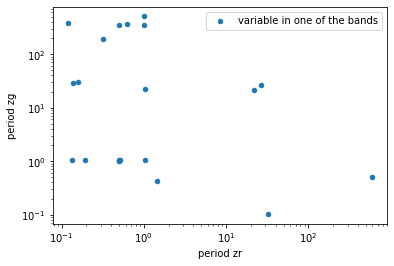

In [13]:
plt.scatter(common_var['period_zr'],common_var['period_zg'],s=20,label='variable in one of the bands')
plt.xlabel('period zr')
plt.ylabel('period zg')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.legend()

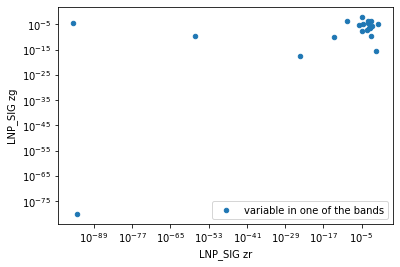

In [14]:
plt.scatter(common_var['LNP_SIG_zr'],common_var['LNP_SIG_zg'],s=20,label='variable in one of the bands')
plt.xlabel('LNP_SIG zr')
plt.ylabel('LNP_SIG zg')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.legend()

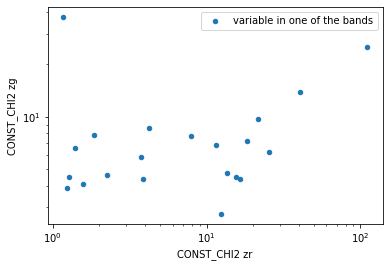

In [15]:
plt.scatter(common_var['CONST_CHI2_zr'],common_var['CONST_CHI2_zg'],s=20,label='variable in one of the bands')
plt.xlabel('CONST_CHI2 zr')
plt.ylabel('CONST_CHI2 zg')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.legend()

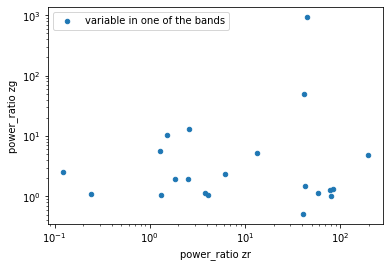

In [16]:
plt.scatter(common_var['power_ratio_zr'],common_var['power_ratio_zg'],s=20,label='variable in one of the bands')
plt.xlabel('power_ratio zr')
plt.ylabel('power_ratio zg')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.legend()

In [8]:
t_zr=QTable.read('t_zr_0518.ecsv')
t_zg=QTable.read('t_zg_0518.ecsv')
t_zr=t_zr[np.isnan(t_zr['LNP_SIG'])==False]
t_zg=t_zg[np.isnan(t_zg['LNP_SIG'])==False]

In [68]:
upsilon_zr=t_zr[t_zr['upsilon_class']!='NonVar']
upsilon_zg=t_zg[t_zg['upsilon_class']!='NonVar']
upsilon_zr=upsilon_zr[upsilon_zr['upsilon_flag']==0]
upsilon_zg=upsilon_zg[upsilon_zg['upsilon_flag']==0]

In [69]:
np.intersect1d(upsilon_zr['SourceID'],obj_zr['SourceID']).shape

(7,)

In [70]:
np.intersect1d(upsilon_zg['SourceID'],obj_zg['SourceID']).shape

(4,)

In [71]:
np.intersect1d(upsilon_zr['SourceID'],upsilon_zg['SourceID'])

array([  77,   90, 1299, 2008])

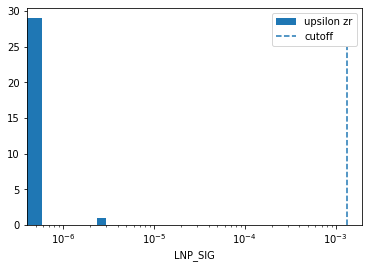

In [72]:
hist(upsilon_zr['LNP_SIG'],bins='scott',label='upsilon zr');
plt.vlines(0.0013169397670255696,0,25,ls='--',label='cutoff')
plt.xlabel('LNP_SIG')
plt.legend()
plt.gca().set_xscale("log")
#plt.gca().set_yscale("log")

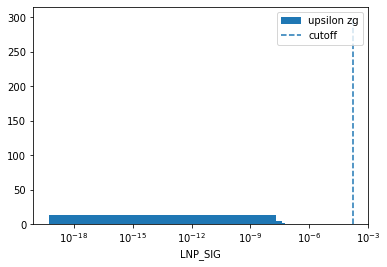

In [73]:
hist(upsilon_zg['LNP_SIG'],bins='scott',label='upsilon zg');
plt.vlines(0.00017317008113315558,0,300,ls='--',label='cutoff')
plt.xlabel('LNP_SIG')
plt.legend()
plt.gca().set_xscale("log")
#plt.gca().set_yscale("log")

In [74]:
upsilon_zr['LNP_SIG'].max(),upsilon_zg['LNP_SIG'].max()

(2.9240137869892287e-06, 4.4389604378670415e-08)

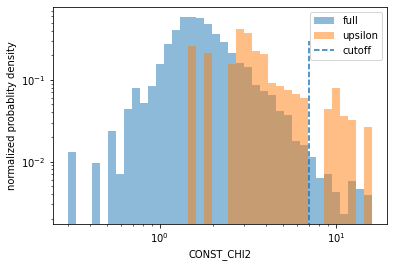

In [75]:
tt_zr=t_zr[(t_zr['CONST_CHI2']>0)&(t_zr['CONST_CHI2']<16)]
_, bins = np.histogram(np.log10(tt_zr['CONST_CHI2']), bins='auto')
plt.hist(tt_zr['CONST_CHI2'], bins=10**bins,density=1,alpha=0.5,label='full');
plt.hist(upsilon_zr['CONST_CHI2'], bins=10**bins,density=1,alpha=0.5,label='upsilon');
plt.vlines(7,0,0.3,ls='--',label='cutoff')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.xlabel('CONST_CHI2')
plt.ylabel('normalized probablity density')
plt.legend()

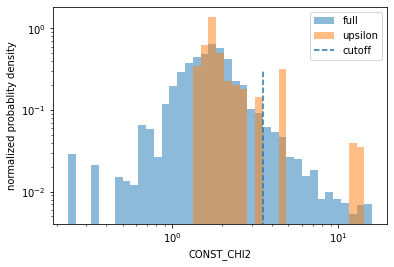

In [76]:
tt_zg=t_zg[(t_zg['CONST_CHI2']>0)&(t_zg['CONST_CHI2']<16)]
_, bins = np.histogram(np.log10(tt_zg['CONST_CHI2']), bins='auto')
plt.hist(tt_zg['CONST_CHI2'], bins=10**bins,density=1,alpha=0.5,label='full');
plt.hist(upsilon_zg['CONST_CHI2'], bins=10**bins,density=1,alpha=0.5,label='upsilon');
plt.vlines(3.5,0,0.3,ls='--',label='cutoff')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.xlabel('CONST_CHI2')
plt.ylabel('normalized probablity density')
plt.legend()

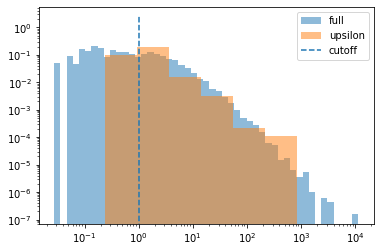

In [79]:
obj=t_zr['power']/t_zr['power_c']
plt.hist(obj,bins=np.logspace(np.log10(obj.min()),np.log10(obj.max()), 50),density=1,alpha=0.5,label='full')
obj=upsilon_zr['power']/upsilon_zr['power_c']
plt.hist(obj,bins=np.logspace(np.log10(obj.min()),np.log10(obj.max()), 7),density=1,alpha=0.5,label='upsilon')
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.vlines(1,0,2.5,ls='--',label='cutoff')
plt.legend()

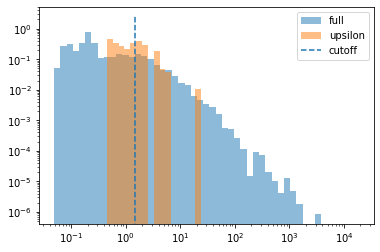

In [80]:
obj=t_zg['power']/t_zg['power_c']
plt.hist(obj, bins=np.logspace(np.log10(obj.min()),np.log10(obj.max()), 50),density=1,alpha=0.5,label='full')
obj=upsilon_zg['power']/upsilon_zg['power_c']
plt.hist(obj,bins=np.logspace(np.log10(obj.min()),np.log10(obj.max()), 20),density=1,alpha=0.5,label='upsilon')
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.vlines(1.5,0,2.5,ls='--',label='cutoff')
plt.legend()

In [57]:
# writeup
# simbad check

In [9]:
t_zr[t_zr['OID']=='806203100057075']

<QTable length=1>
SourceID filter       OID       ... upsilon_prob upsilon_flag   upsilon_period 
 int32    str2       str16      ...   float64      float64         float64     
-------- ------ --------------- ... ------------ ------------ -----------------
     158     zr 806203100057075 ...         0.46          0.0 642.8628877500013

In [11]:
functions.query(158)

<QTable length=2>
SourceID filter       OID        ... upsilon_flag   upsilon_period  
 int32    str2       str16       ...   float64         float64      
-------- ------ ---------------- ... ------------ ------------------
     158     zr  806203100057075 ...          0.0  642.8628877500013
     158     zr 1809211300042636 ...          1.0 1331.7022916999922

<QTable length=2>
SourceID filter       OID        ... upsilon_flag    upsilon_period   
 int32    str2       str16       ...   float64          float64       
-------- ------ ---------------- ... ------------ --------------------
     158     zg 1809111300037377 ...          1.0  0.03750857766155011
     158     zg  806103100042723 ...          1.0 0.048990047011165556

period= 600.0 d     LNP_SIG= 8.289684257613343e-48


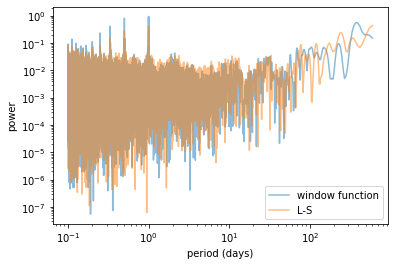

In [16]:
functions.windowfunc(806203100057075,low=0.1,high=600,nan=True)

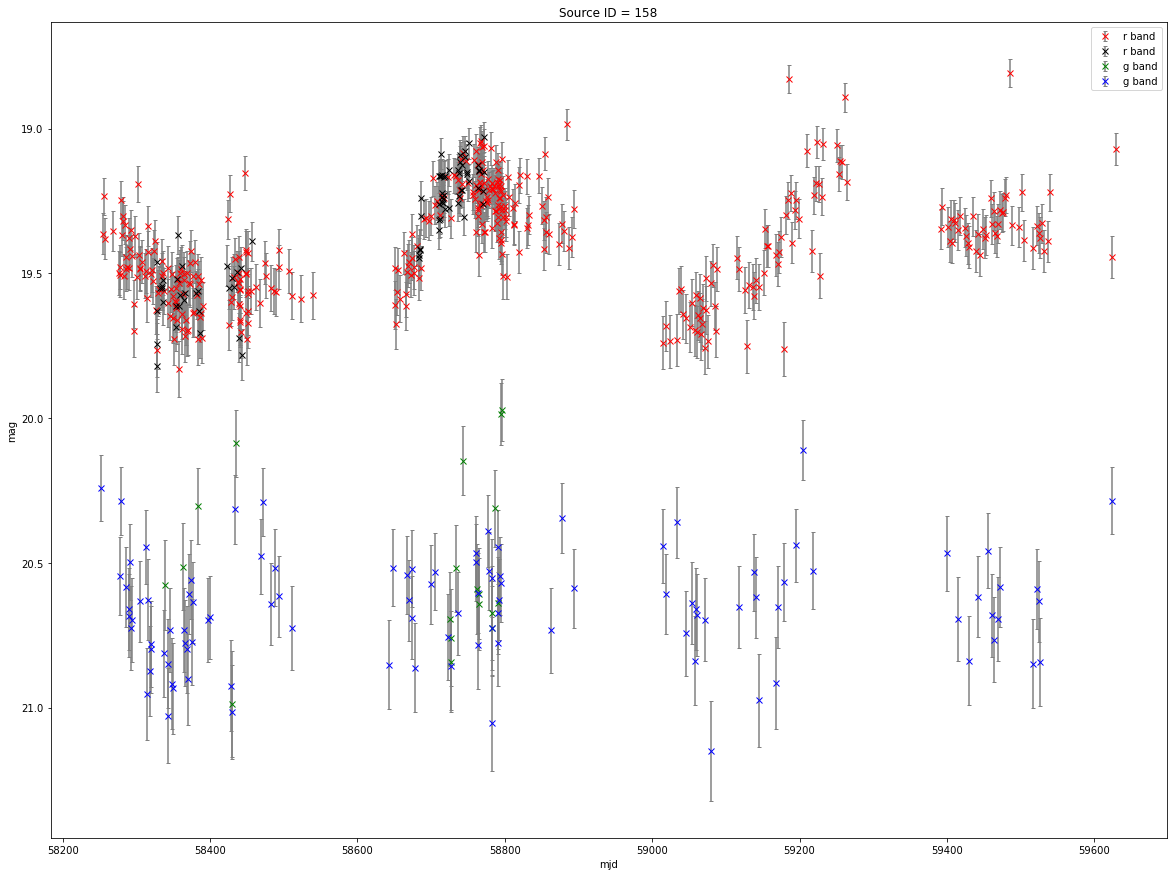

In [13]:
functions.draw_lightcurve(158)

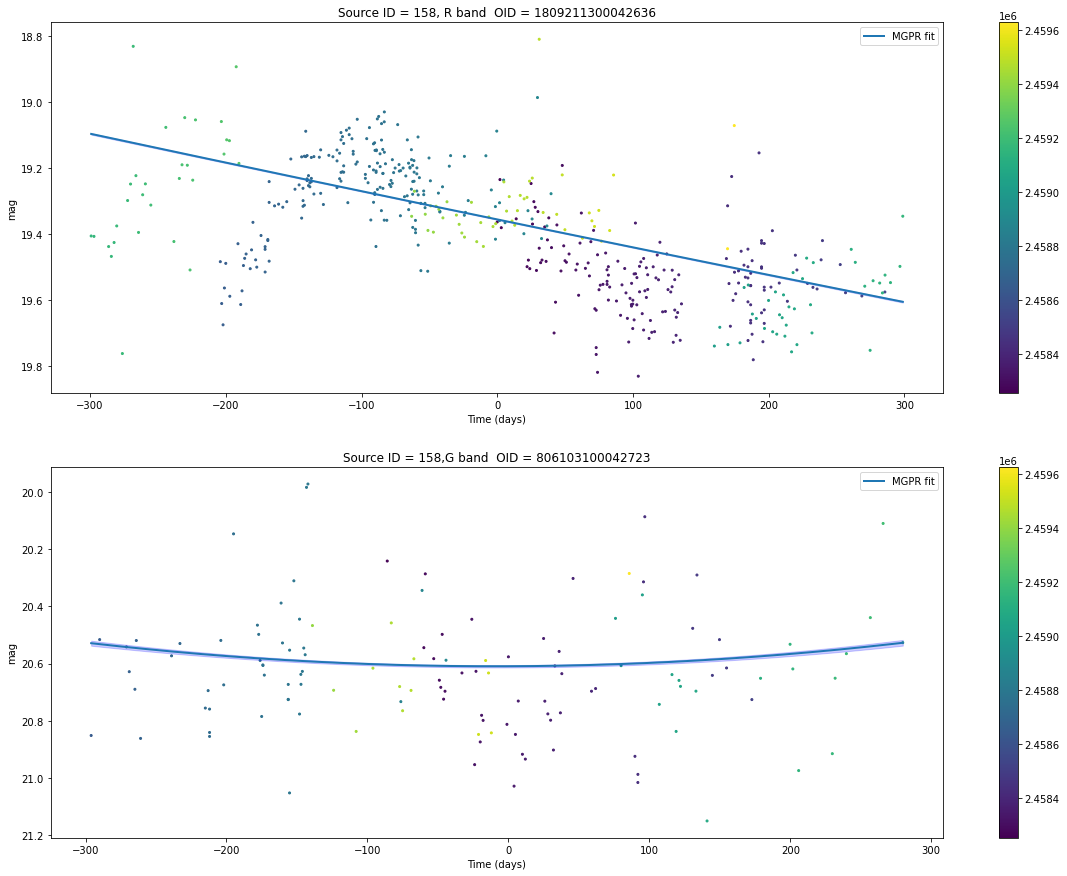

In [22]:
functions.MGPRfit(158,force_period=600,errscale=0.3)

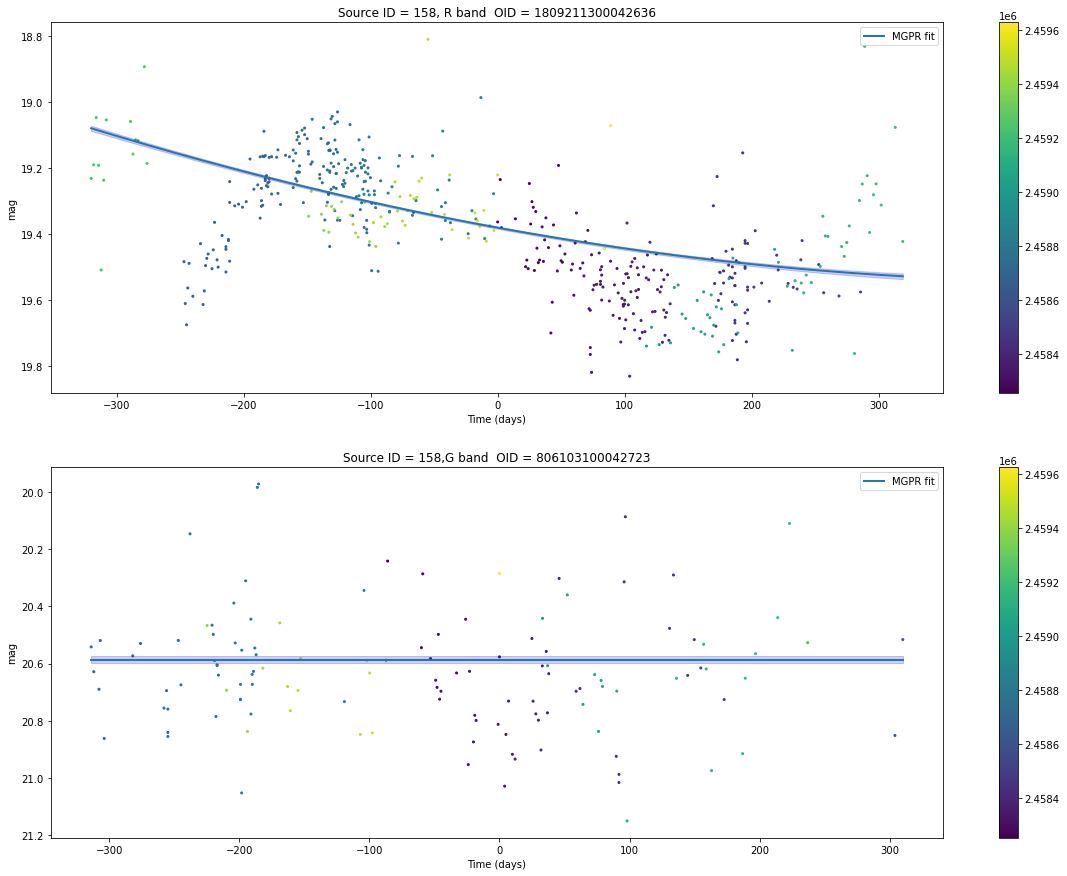

In [17]:
functions.MGPRfit(158,force_period=642.8628877500013)